Import Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from config import weather_api_key
import requests
import numpy as np

Finding count totals, Dropping NaN, dropping unnecessary columns

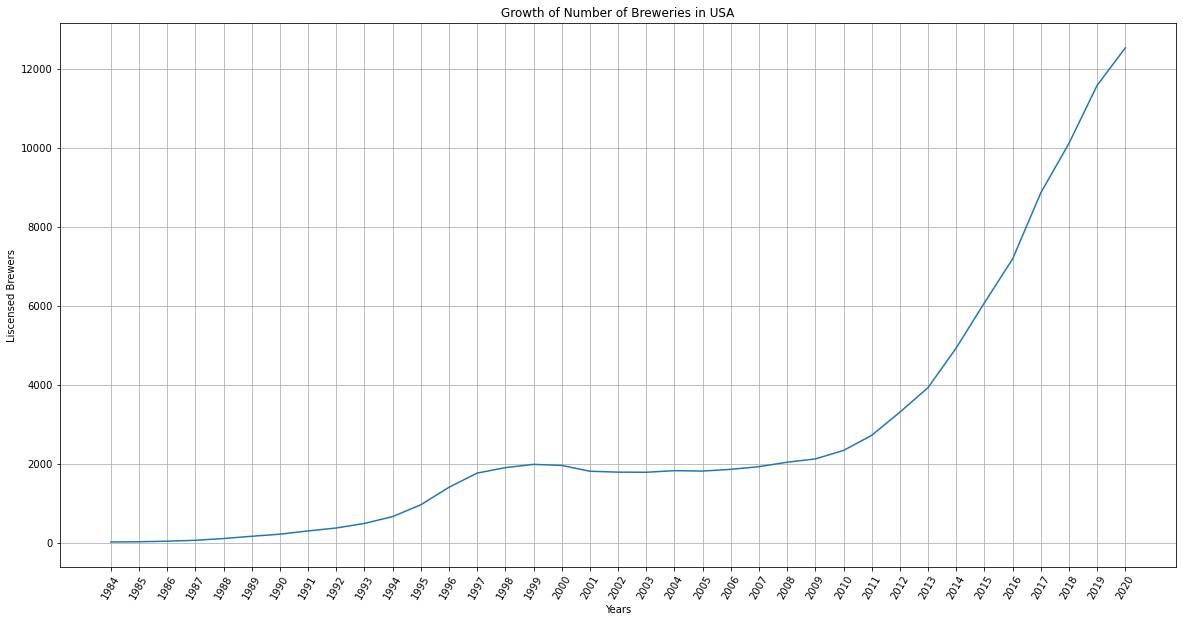

In [4]:
fed_beer_df = pd.read_csv("../Resources/brewery_count.csv")
total_count_series = fed_beer_df.sum()
total_count_series = total_count_series.drop("STATE")
years = total_count_series.index
plt.figure(figsize = (20,10))
plt.plot(years, total_count_series)
plt.xlabel("Years")
plt.ylabel("Liscensed Brewers")
plt.title("Growth of Number of Breweries in USA")
plt.grid(True)
plt.xticks(rotation = 60)
plt.savefig("../Output/Brewery_Growth_Line.png")
plt.show()

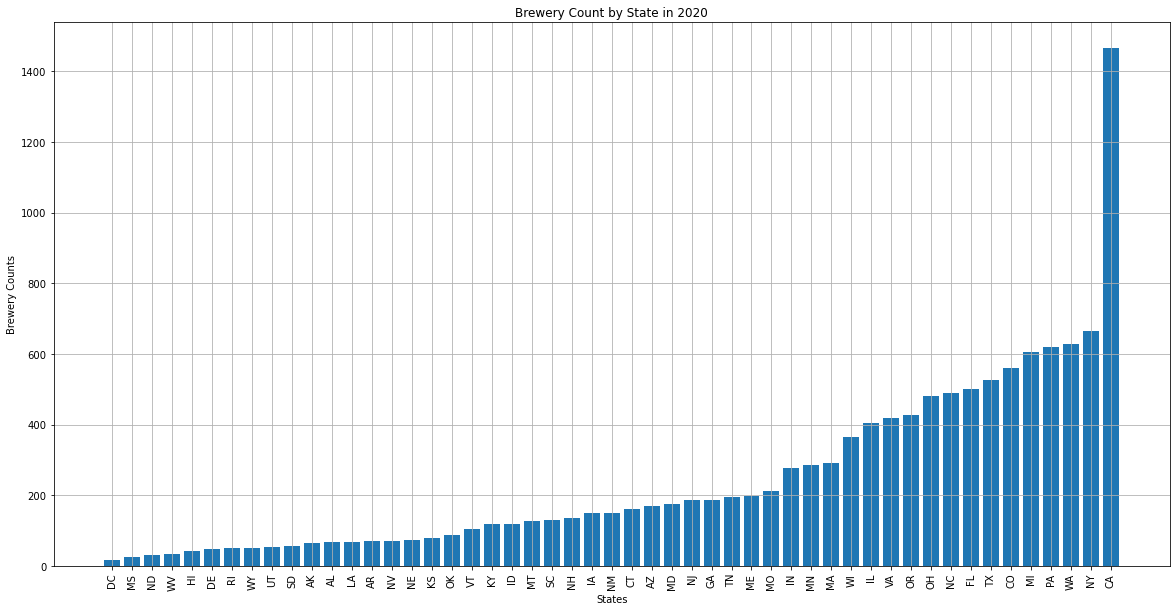

In [6]:
fed_2020 = fed_beer_df[["STATE", "2020"]].sort_values(by = "2020")
plt.figure(figsize = (20,10))
plt.bar(x = fed_2020["STATE"], height = fed_2020["2020"])
plt.xlabel("States")
plt.ylabel("Brewery Counts")
plt.title("Brewery Count by State in 2020")
plt.grid(True)
plt.xticks(rotation = 90)
plt.savefig("../Output/Brewery_Count_Bar.png")
plt.show()

In [8]:
openbrewery_db = pd.read_csv("../Resources/breweries.csv")
openbrewery_db = openbrewery_db[["name", "brewery_type", "city", "state", "postal_code", "country", "longitude", "latitude"]]
dropped_df = openbrewery_db.dropna()
dropped_df
# colorado_beer = dropped_df[dropped_df["state"] == "Colorado"]
# colorado_beer.to_csv("colorado_df.csv")

,name,brewery_type,city,state,postal_code,country,longitude,latitude
0,10-56 Brewing Company,micro,Knox,Indiana,46534,United States,-86.627954,41.289715
3,10 Barrel Brewing Co - Bend Pub,large,Bend,Oregon,97701,United States,-121.280954,44.091211
4,10 Barrel Brewing Co - Boise,large,Boise,Idaho,83702-5857,United States,-116.202929,43.618516
5,10 Barrel Brewing Co - Denver,large,Denver,Colorado,80205-2231,United States,-104.985366,39.759251
6,10 Barrel Brewing Co,large,Portland,Oregon,97209-2620,United States,-122.685506,45.525979
...,...,...,...,...,...,...,...,...
7790,Zorn Brew Works,micro,Michigan City,Indiana,46360-3651,United States,-86.892168,41.714577
7792,Zuni Street Brewing Company,micro,Denver,Colorado,80211-3753,United States,-105.015409,39.758593
7793,ZwanzigZ Brewing,brewpub,Columbus,Indiana,47201-5756,United States,-85.918836,39.208657
7795,Zydeco Brew Werks,brewpub,Tampa,Florida,33605-3810,United States,-82.437832,27.960344


In [10]:
small_batch_df = openbrewery_db[(openbrewery_db["brewery_type"] == "micro") | (openbrewery_db["brewery_type"] == "brewpub")]
types = openbrewery_db["brewery_type"].value_counts()
types_other = types[7:10]
other_sum = pd.Series({ "other" : types_other.sum()})
types = types.drop(index = ["closed", "nano", "bar"])
types = types.append(other_sum)
types=types.reindex(index = (["micro","other","brewpub","regional","proprietor","contract","planning","large"]))

In [12]:
total = types.sum()
labels_per = []
for each in types:
    percent = round(each/total *100,1)
    labels_per.append(percent)
label_ser = pd.Series(labels_per, index = types.index)

Two options on the pie chart for counts, 

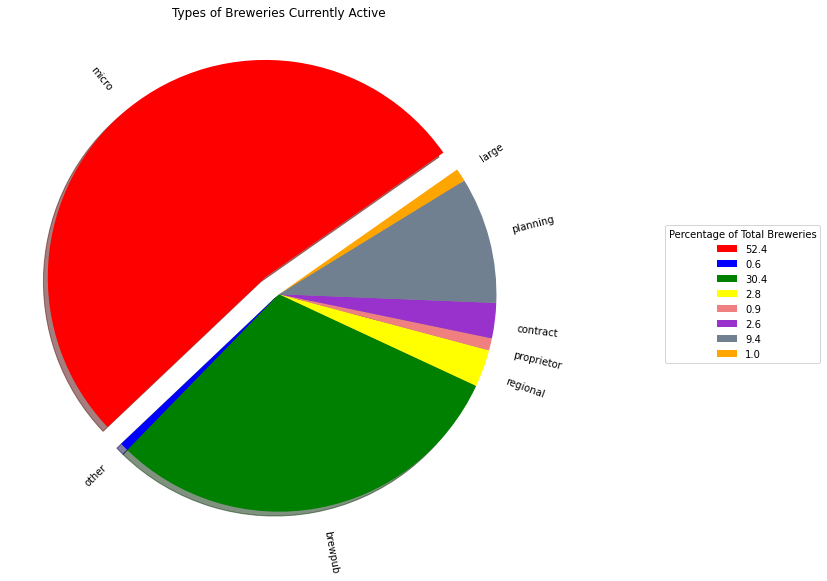

In [17]:
labels = types.index
explode = [.1,0,0,0,0,0,0,0]
colors = ["red","blue","green", "yellow", "lightcoral", "darkorchid", "slategray", "orange"]
plt.figure(figsize = (15,10))
plt.pie(types,explode = explode, labels = labels, colors = colors, shadow = True,rotatelabels = True,startangle= 35 )
plt.title("Types of Breweries Currently Active")
plt.legend(wedges,(label_ser),
          title="Percentage of Total Breweries",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.savefig("../Output/Brewery_Type_Pie.png")
plt.show()

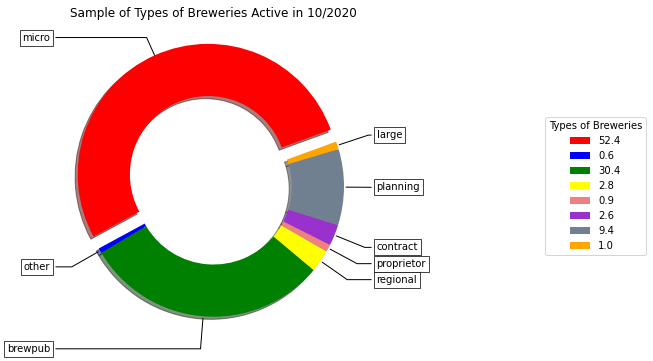

In [18]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(types,wedgeprops=dict(width=.4), startangle=20, colors = colors, explode = explode, shadow = True)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)
ax.legend(wedges, labels_per,
          title="Types of Breweries",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title("Sample of Types of Breweries Active in 10/2020")
plt.savefig("../Output/Brewery_Type_Donut.png")
plt.show()

In [20]:
display(dropped_df)

,name,brewery_type,city,state,postal_code,country,longitude,latitude
0,10-56 Brewing Company,micro,Knox,Indiana,46534,United States,-86.627954,41.289715
3,10 Barrel Brewing Co - Bend Pub,large,Bend,Oregon,97701,United States,-121.280954,44.091211
4,10 Barrel Brewing Co - Boise,large,Boise,Idaho,83702-5857,United States,-116.202929,43.618516
5,10 Barrel Brewing Co - Denver,large,Denver,Colorado,80205-2231,United States,-104.985366,39.759251
6,10 Barrel Brewing Co,large,Portland,Oregon,97209-2620,United States,-122.685506,45.525979
...,...,...,...,...,...,...,...,...
7790,Zorn Brew Works,micro,Michigan City,Indiana,46360-3651,United States,-86.892168,41.714577
7792,Zuni Street Brewing Company,micro,Denver,Colorado,80211-3753,United States,-105.015409,39.758593
7793,ZwanzigZ Brewing,brewpub,Columbus,Indiana,47201-5756,United States,-85.918836,39.208657
7795,Zydeco Brew Werks,brewpub,Tampa,Florida,33605-3810,United States,-82.437832,27.960344


In [21]:
latitudes = dropped_df["latitude"]
longitudes = dropped_df["longitude"]
url = "http://api.openweathermap.org/data/2.5/weather?lat="
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
found_lats = []
found_longs = []
new_list = zip(latitudes, longitudes)
for i,x in enumerate(new_list):
    lon = x[1]
    lat = x[0]
    city_json = requests.get(f'{url}{lat}&lon={lon}&appid={weather_api_key}').json()
    display(f'Set {i} Found.')
    try:
        max_temp.append(city_json["main"]["temp_max"])
    except:
        display(f'{lat,lon} not found. Skipping...')
        pass

'Set 0 Found.'

'Set 1 Found.'

'Set 2 Found.'

'Set 3 Found.'

'Set 4 Found.'

'Set 5 Found.'

'Set 6 Found.'

'Set 7 Found.'

'Set 8 Found.'

'Set 9 Found.'

'Set 10 Found.'

'Set 11 Found.'

'Set 12 Found.'

'Set 13 Found.'

'Set 14 Found.'

'Set 15 Found.'

'Set 16 Found.'

'Set 17 Found.'

'Set 18 Found.'

'Set 19 Found.'

'Set 20 Found.'

'Set 21 Found.'

'Set 22 Found.'

'Set 23 Found.'

'Set 24 Found.'

'Set 25 Found.'

'Set 26 Found.'

'Set 27 Found.'

'Set 28 Found.'

'Set 29 Found.'

'Set 30 Found.'

'Set 31 Found.'

'Set 32 Found.'

'Set 33 Found.'

'Set 34 Found.'

'Set 35 Found.'

'Set 36 Found.'

'Set 37 Found.'

'Set 38 Found.'

'Set 39 Found.'

'Set 40 Found.'

'Set 41 Found.'

'Set 42 Found.'

'Set 43 Found.'

'Set 44 Found.'

'Set 45 Found.'

'Set 46 Found.'

'Set 47 Found.'

'Set 48 Found.'

'Set 49 Found.'

'Set 50 Found.'

'Set 51 Found.'

'Set 52 Found.'

'Set 53 Found.'

'Set 54 Found.'

'Set 55 Found.'

'Set 56 Found.'

'Set 57 Found.'

'Set 58 Found.'

'Set 59 Found.'

'Set 60 Found.'

'Set 61 Found.'

'Set 62 Found.'

'Set 63 Found.'

'Set 64 Found.'

'Set 65 Found.'

'Set 66 Found.'

'Set 67 Found.'

'Set 68 Found.'

'Set 69 Found.'

'Set 70 Found.'

'Set 71 Found.'

'Set 72 Found.'

'Set 73 Found.'

'Set 74 Found.'

'Set 75 Found.'

'Set 76 Found.'

'Set 77 Found.'

'Set 78 Found.'

'Set 79 Found.'

'Set 80 Found.'

'Set 81 Found.'

'Set 82 Found.'

'Set 83 Found.'

'Set 84 Found.'

'Set 85 Found.'

'Set 86 Found.'

'Set 87 Found.'

'Set 88 Found.'

'Set 89 Found.'

'Set 90 Found.'

'Set 91 Found.'

'Set 92 Found.'

'Set 93 Found.'

'Set 94 Found.'

'Set 95 Found.'

'Set 96 Found.'

'Set 97 Found.'

'Set 98 Found.'

'Set 99 Found.'

'Set 100 Found.'

'Set 101 Found.'

'Set 102 Found.'

'Set 103 Found.'

'Set 104 Found.'

'Set 105 Found.'

'Set 106 Found.'

'Set 107 Found.'

'Set 108 Found.'

'Set 109 Found.'

'Set 110 Found.'

'Set 111 Found.'

'Set 112 Found.'

'Set 113 Found.'

'Set 114 Found.'

'Set 115 Found.'

'Set 116 Found.'

'Set 117 Found.'

'Set 118 Found.'

'Set 119 Found.'

'Set 120 Found.'

'Set 121 Found.'

'Set 122 Found.'

'Set 123 Found.'

'Set 124 Found.'

'Set 125 Found.'

'Set 126 Found.'

'Set 127 Found.'

'Set 128 Found.'

'Set 129 Found.'

'Set 130 Found.'

'Set 131 Found.'

'Set 132 Found.'

'Set 133 Found.'

'Set 134 Found.'

'Set 135 Found.'

'Set 136 Found.'

'Set 137 Found.'

'Set 138 Found.'

'Set 139 Found.'

'Set 140 Found.'

'Set 141 Found.'

'Set 142 Found.'

'Set 143 Found.'

'Set 144 Found.'

'Set 145 Found.'

'Set 146 Found.'

'Set 147 Found.'

'Set 148 Found.'

'Set 149 Found.'

'Set 150 Found.'

'Set 151 Found.'

'Set 152 Found.'

'Set 153 Found.'

'Set 154 Found.'

'Set 155 Found.'

'Set 156 Found.'

'Set 157 Found.'

'Set 158 Found.'

'Set 159 Found.'

'Set 160 Found.'

'Set 161 Found.'

'Set 162 Found.'

'Set 163 Found.'

'Set 164 Found.'

'Set 165 Found.'

'Set 166 Found.'

'Set 167 Found.'

'Set 168 Found.'

'Set 169 Found.'

'Set 170 Found.'

'Set 171 Found.'

'Set 172 Found.'

'Set 173 Found.'

'Set 174 Found.'

'Set 175 Found.'

'Set 176 Found.'

'Set 177 Found.'

'Set 178 Found.'

'Set 179 Found.'

'Set 180 Found.'

'Set 181 Found.'

'Set 182 Found.'

'Set 183 Found.'

'Set 184 Found.'

'Set 185 Found.'

'Set 186 Found.'

'Set 187 Found.'

'Set 188 Found.'

'Set 189 Found.'

'Set 190 Found.'

'Set 191 Found.'

'Set 192 Found.'

'Set 193 Found.'

'Set 194 Found.'

'Set 195 Found.'

'Set 196 Found.'

'Set 197 Found.'

'Set 198 Found.'

'Set 199 Found.'

'Set 200 Found.'

'Set 201 Found.'

'Set 202 Found.'

'Set 203 Found.'

'Set 204 Found.'

'Set 205 Found.'

'Set 206 Found.'

'Set 207 Found.'

'Set 208 Found.'

'Set 209 Found.'

'Set 210 Found.'

'Set 211 Found.'

'Set 212 Found.'

'Set 213 Found.'

'Set 214 Found.'

'Set 215 Found.'

'Set 216 Found.'

'Set 217 Found.'

'Set 218 Found.'

'Set 219 Found.'

'Set 220 Found.'

'Set 221 Found.'

'Set 222 Found.'

'Set 223 Found.'

'Set 224 Found.'

'Set 225 Found.'

'Set 226 Found.'

'Set 227 Found.'

'Set 228 Found.'

'Set 229 Found.'

'Set 230 Found.'

'Set 231 Found.'

'Set 232 Found.'

'Set 233 Found.'

'Set 234 Found.'

'Set 235 Found.'

'Set 236 Found.'

'Set 237 Found.'

'Set 238 Found.'

'Set 239 Found.'

'Set 240 Found.'

'Set 241 Found.'

'Set 242 Found.'

'Set 243 Found.'

'Set 244 Found.'

'Set 245 Found.'

'Set 246 Found.'

'Set 247 Found.'

'Set 248 Found.'

'Set 249 Found.'

'Set 250 Found.'

'Set 251 Found.'

'Set 252 Found.'

'Set 253 Found.'

'Set 254 Found.'

'Set 255 Found.'

'Set 256 Found.'

'Set 257 Found.'

'Set 258 Found.'

'Set 259 Found.'

'Set 260 Found.'

'Set 261 Found.'

'Set 262 Found.'

'Set 263 Found.'

'Set 264 Found.'

'Set 265 Found.'

'Set 266 Found.'

'Set 267 Found.'

'Set 268 Found.'

'Set 269 Found.'

'Set 270 Found.'

'Set 271 Found.'

'Set 272 Found.'

'Set 273 Found.'

'Set 274 Found.'

'Set 275 Found.'

'Set 276 Found.'

'Set 277 Found.'

'Set 278 Found.'

'Set 279 Found.'

'Set 280 Found.'

'Set 281 Found.'

'Set 282 Found.'

'Set 283 Found.'

'Set 284 Found.'

'Set 285 Found.'

'Set 286 Found.'

'Set 287 Found.'

'Set 288 Found.'

'Set 289 Found.'

'Set 290 Found.'

'Set 291 Found.'

'Set 292 Found.'

'Set 293 Found.'

'Set 294 Found.'

'Set 295 Found.'

'Set 296 Found.'

'Set 297 Found.'

'Set 298 Found.'

'Set 299 Found.'

'Set 300 Found.'

'Set 301 Found.'

'Set 302 Found.'

'Set 303 Found.'

'Set 304 Found.'

'Set 305 Found.'

'Set 306 Found.'

'Set 307 Found.'

'Set 308 Found.'

'Set 309 Found.'

'Set 310 Found.'

'Set 311 Found.'

'Set 312 Found.'

'Set 313 Found.'

'Set 314 Found.'

'Set 315 Found.'

'Set 316 Found.'

'Set 317 Found.'

'Set 318 Found.'

'Set 319 Found.'

'Set 320 Found.'

'Set 321 Found.'

'Set 322 Found.'

'Set 323 Found.'

'Set 324 Found.'

'Set 325 Found.'

'Set 326 Found.'

'Set 327 Found.'

'Set 328 Found.'

'Set 329 Found.'

'Set 330 Found.'

'Set 331 Found.'

'Set 332 Found.'

'Set 333 Found.'

'Set 334 Found.'

'Set 335 Found.'

'Set 336 Found.'

'Set 337 Found.'

'Set 338 Found.'

'Set 339 Found.'

'Set 340 Found.'

'Set 341 Found.'

'Set 342 Found.'

'Set 343 Found.'

'Set 344 Found.'

'Set 345 Found.'

'Set 346 Found.'

'Set 347 Found.'

'Set 348 Found.'

'Set 349 Found.'

'Set 350 Found.'

'Set 351 Found.'

'Set 352 Found.'

'Set 353 Found.'

'Set 354 Found.'

'Set 355 Found.'

'Set 356 Found.'

'Set 357 Found.'

'Set 358 Found.'

'Set 359 Found.'

'Set 360 Found.'

'Set 361 Found.'

'Set 362 Found.'

'Set 363 Found.'

'Set 364 Found.'

'Set 365 Found.'

'Set 366 Found.'

'Set 367 Found.'

'Set 368 Found.'

'Set 369 Found.'

'Set 370 Found.'

'Set 371 Found.'

'Set 372 Found.'

'Set 373 Found.'

'Set 374 Found.'

'Set 375 Found.'

'Set 376 Found.'

'Set 377 Found.'

'Set 378 Found.'

'Set 379 Found.'

'Set 380 Found.'

'Set 381 Found.'

'Set 382 Found.'

'Set 383 Found.'

'Set 384 Found.'

'Set 385 Found.'

'Set 386 Found.'

'Set 387 Found.'

'Set 388 Found.'

'Set 389 Found.'

'Set 390 Found.'

'Set 391 Found.'

'Set 392 Found.'

'Set 393 Found.'

'Set 394 Found.'

'Set 395 Found.'

'Set 396 Found.'

'Set 397 Found.'

'Set 398 Found.'

'Set 399 Found.'

'Set 400 Found.'

'Set 401 Found.'

'Set 402 Found.'

'Set 403 Found.'

'Set 404 Found.'

'Set 405 Found.'

'Set 406 Found.'

'Set 407 Found.'

'Set 408 Found.'

'Set 409 Found.'

'Set 410 Found.'

'Set 411 Found.'

'Set 412 Found.'

'Set 413 Found.'

'Set 414 Found.'

'Set 415 Found.'

'Set 416 Found.'

'Set 417 Found.'

'Set 418 Found.'

'Set 419 Found.'

'Set 420 Found.'

'Set 421 Found.'

'Set 422 Found.'

'Set 423 Found.'

'Set 424 Found.'

'Set 425 Found.'

'Set 426 Found.'

'Set 427 Found.'

'Set 428 Found.'

'Set 429 Found.'

'Set 430 Found.'

'Set 431 Found.'

'Set 432 Found.'

'Set 433 Found.'

'Set 434 Found.'

'Set 435 Found.'

'Set 436 Found.'

'Set 437 Found.'

'Set 438 Found.'

'Set 439 Found.'

'Set 440 Found.'

'Set 441 Found.'

'Set 442 Found.'

'Set 443 Found.'

'Set 444 Found.'

'Set 445 Found.'

'Set 446 Found.'

'Set 447 Found.'

'Set 448 Found.'

'Set 449 Found.'

'Set 450 Found.'

'Set 451 Found.'

'Set 452 Found.'

'Set 453 Found.'

'Set 454 Found.'

'Set 455 Found.'

'Set 456 Found.'

'Set 457 Found.'

'Set 458 Found.'

'Set 459 Found.'

'Set 460 Found.'

'Set 461 Found.'

'Set 462 Found.'

'Set 463 Found.'

'Set 464 Found.'

'Set 465 Found.'

'Set 466 Found.'

'Set 467 Found.'

'Set 468 Found.'

'Set 469 Found.'

'Set 470 Found.'

'Set 471 Found.'

'Set 472 Found.'

'Set 473 Found.'

'Set 474 Found.'

'Set 475 Found.'

'Set 476 Found.'

'Set 477 Found.'

'Set 478 Found.'

'Set 479 Found.'

'Set 480 Found.'

'Set 481 Found.'

'Set 482 Found.'

'Set 483 Found.'

'Set 484 Found.'

'Set 485 Found.'

'Set 486 Found.'

'Set 487 Found.'

'Set 488 Found.'

'Set 489 Found.'

'Set 490 Found.'

'Set 491 Found.'

'Set 492 Found.'

'Set 493 Found.'

'Set 494 Found.'

'Set 495 Found.'

'Set 496 Found.'

'Set 497 Found.'

'Set 498 Found.'

'Set 499 Found.'

'Set 500 Found.'

'Set 501 Found.'

'Set 502 Found.'

'Set 503 Found.'

'Set 504 Found.'

'Set 505 Found.'

'Set 506 Found.'

'Set 507 Found.'

'Set 508 Found.'

'Set 509 Found.'

'Set 510 Found.'

'Set 511 Found.'

'Set 512 Found.'

'Set 513 Found.'

'Set 514 Found.'

'Set 515 Found.'

'Set 516 Found.'

'Set 517 Found.'

'Set 518 Found.'

'Set 519 Found.'

'Set 520 Found.'

'Set 521 Found.'

'Set 522 Found.'

'Set 523 Found.'

'Set 524 Found.'

'Set 525 Found.'

'Set 526 Found.'

'Set 527 Found.'

'Set 528 Found.'

'Set 529 Found.'

'Set 530 Found.'

'Set 531 Found.'

'Set 532 Found.'

'Set 533 Found.'

'Set 534 Found.'

'Set 535 Found.'

'Set 536 Found.'

'Set 537 Found.'

'Set 538 Found.'

'Set 539 Found.'

'Set 540 Found.'

'Set 541 Found.'

'Set 542 Found.'

'Set 543 Found.'

'Set 544 Found.'

'Set 545 Found.'

'Set 546 Found.'

'Set 547 Found.'

'Set 548 Found.'

'Set 549 Found.'

'Set 550 Found.'

'Set 551 Found.'

'Set 552 Found.'

'Set 553 Found.'

'Set 554 Found.'

'Set 555 Found.'

'Set 556 Found.'

'Set 557 Found.'

'Set 558 Found.'

'Set 559 Found.'

'Set 560 Found.'

'Set 561 Found.'

'Set 562 Found.'

'Set 563 Found.'

'Set 564 Found.'

'Set 565 Found.'

'Set 566 Found.'

'Set 567 Found.'

'Set 568 Found.'

'Set 569 Found.'

'Set 570 Found.'

'Set 571 Found.'

'Set 572 Found.'

'Set 573 Found.'

'Set 574 Found.'

'Set 575 Found.'

'Set 576 Found.'

'Set 577 Found.'

'Set 578 Found.'

'Set 579 Found.'

'Set 580 Found.'

'Set 581 Found.'

'Set 582 Found.'

'Set 583 Found.'

'Set 584 Found.'

'Set 585 Found.'

'Set 586 Found.'

'Set 587 Found.'

'Set 588 Found.'

'Set 589 Found.'

'Set 590 Found.'

'Set 591 Found.'

'Set 592 Found.'

'Set 593 Found.'

'Set 594 Found.'

'Set 595 Found.'

'Set 596 Found.'

'Set 597 Found.'

'Set 598 Found.'

'Set 599 Found.'

'Set 600 Found.'

'Set 601 Found.'

'Set 602 Found.'

'Set 603 Found.'

'Set 604 Found.'

'Set 605 Found.'

'Set 606 Found.'

'Set 607 Found.'

'Set 608 Found.'

'Set 609 Found.'

'Set 610 Found.'

'Set 611 Found.'

'Set 612 Found.'

'Set 613 Found.'

'Set 614 Found.'

'Set 615 Found.'

'Set 616 Found.'

'Set 617 Found.'

'Set 618 Found.'

'Set 619 Found.'

'Set 620 Found.'

'Set 621 Found.'

'Set 622 Found.'

'Set 623 Found.'

'Set 624 Found.'

'Set 625 Found.'

'Set 626 Found.'

'Set 627 Found.'

'Set 628 Found.'

'Set 629 Found.'

'Set 630 Found.'

'Set 631 Found.'

'Set 632 Found.'

'Set 633 Found.'

'Set 634 Found.'

'Set 635 Found.'

'Set 636 Found.'

'Set 637 Found.'

'Set 638 Found.'

'Set 639 Found.'

'Set 640 Found.'

'Set 641 Found.'

'Set 642 Found.'

'Set 643 Found.'

'Set 644 Found.'

'Set 645 Found.'

'Set 646 Found.'

'Set 647 Found.'

'Set 648 Found.'

'Set 649 Found.'

'Set 650 Found.'

'Set 651 Found.'

'Set 652 Found.'

'Set 653 Found.'

'Set 654 Found.'

'Set 655 Found.'

'Set 656 Found.'

'Set 657 Found.'

'Set 658 Found.'

'Set 659 Found.'

'Set 660 Found.'

'Set 661 Found.'

'Set 662 Found.'

'Set 663 Found.'

'Set 664 Found.'

'Set 665 Found.'

'Set 666 Found.'

'Set 667 Found.'

'Set 668 Found.'

'Set 669 Found.'

'Set 670 Found.'

'Set 671 Found.'

'Set 672 Found.'

'Set 673 Found.'

'Set 674 Found.'

'Set 675 Found.'

'Set 676 Found.'

'Set 677 Found.'

'Set 678 Found.'

'Set 679 Found.'

'Set 680 Found.'

'Set 681 Found.'

'Set 682 Found.'

'Set 683 Found.'

'Set 684 Found.'

'Set 685 Found.'

'Set 686 Found.'

'Set 687 Found.'

'Set 688 Found.'

'Set 689 Found.'

'Set 690 Found.'

'Set 691 Found.'

'Set 692 Found.'

'Set 693 Found.'

'Set 694 Found.'

'Set 695 Found.'

'Set 696 Found.'

'Set 697 Found.'

'Set 698 Found.'

'Set 699 Found.'

'Set 700 Found.'

'Set 701 Found.'

'Set 702 Found.'

'Set 703 Found.'

'Set 704 Found.'

'Set 705 Found.'

'Set 706 Found.'

'Set 707 Found.'

'Set 708 Found.'

'Set 709 Found.'

'Set 710 Found.'

'Set 711 Found.'

'Set 712 Found.'

'Set 713 Found.'

'Set 714 Found.'

'Set 715 Found.'

'Set 716 Found.'

'Set 717 Found.'

'Set 718 Found.'

'Set 719 Found.'

'Set 720 Found.'

'Set 721 Found.'

'Set 722 Found.'

'Set 723 Found.'

'Set 724 Found.'

'Set 725 Found.'

'Set 726 Found.'

'Set 727 Found.'

'Set 728 Found.'

'Set 729 Found.'

'Set 730 Found.'

'Set 731 Found.'

'Set 732 Found.'

'Set 733 Found.'

'Set 734 Found.'

'Set 735 Found.'

'Set 736 Found.'

'Set 737 Found.'

'Set 738 Found.'

'Set 739 Found.'

'Set 740 Found.'

'Set 741 Found.'

'Set 742 Found.'

'Set 743 Found.'

'Set 744 Found.'

'Set 745 Found.'

'Set 746 Found.'

'Set 747 Found.'

'Set 748 Found.'

'Set 749 Found.'

'Set 750 Found.'

'Set 751 Found.'

'Set 752 Found.'

'Set 753 Found.'

'Set 754 Found.'

'Set 755 Found.'

'Set 756 Found.'

'Set 757 Found.'

'Set 758 Found.'

'Set 759 Found.'

'Set 760 Found.'

'Set 761 Found.'

'Set 762 Found.'

'Set 763 Found.'

'Set 764 Found.'

'Set 765 Found.'

'Set 766 Found.'

'Set 767 Found.'

'Set 768 Found.'

'Set 769 Found.'

'Set 770 Found.'

'Set 771 Found.'

'Set 772 Found.'

'Set 773 Found.'

'Set 774 Found.'

'Set 775 Found.'

'Set 776 Found.'

'Set 777 Found.'

'Set 778 Found.'

'Set 779 Found.'

'Set 780 Found.'

'Set 781 Found.'

'Set 782 Found.'

'Set 783 Found.'

'Set 784 Found.'

'Set 785 Found.'

'Set 786 Found.'

'Set 787 Found.'

'Set 788 Found.'

'Set 789 Found.'

'Set 790 Found.'

'Set 791 Found.'

'Set 792 Found.'

'Set 793 Found.'

'Set 794 Found.'

'Set 795 Found.'

'Set 796 Found.'

'Set 797 Found.'

'Set 798 Found.'

'Set 799 Found.'

'Set 800 Found.'

'Set 801 Found.'

'Set 802 Found.'

'Set 803 Found.'

'Set 804 Found.'

'Set 805 Found.'

'Set 806 Found.'

'Set 807 Found.'

'Set 808 Found.'

'Set 809 Found.'

'Set 810 Found.'

'Set 811 Found.'

'Set 812 Found.'

'Set 813 Found.'

'Set 814 Found.'

'Set 815 Found.'

'Set 816 Found.'

'Set 817 Found.'

'Set 818 Found.'

'Set 819 Found.'

'Set 820 Found.'

'Set 821 Found.'

'Set 822 Found.'

'Set 823 Found.'

'Set 824 Found.'

'Set 825 Found.'

'Set 826 Found.'

'Set 827 Found.'

'Set 828 Found.'

'Set 829 Found.'

'Set 830 Found.'

'Set 831 Found.'

'Set 832 Found.'

'Set 833 Found.'

'Set 834 Found.'

'Set 835 Found.'

'Set 836 Found.'

'Set 837 Found.'

'Set 838 Found.'

'Set 839 Found.'

'Set 840 Found.'

'Set 841 Found.'

'Set 842 Found.'

'Set 843 Found.'

'Set 844 Found.'

'Set 845 Found.'

'Set 846 Found.'

'Set 847 Found.'

'Set 848 Found.'

'Set 849 Found.'

'Set 850 Found.'

'Set 851 Found.'

'Set 852 Found.'

'Set 853 Found.'

'Set 854 Found.'

'Set 855 Found.'

'Set 856 Found.'

'Set 857 Found.'

'Set 858 Found.'

'Set 859 Found.'

'Set 860 Found.'

'Set 861 Found.'

'Set 862 Found.'

'Set 863 Found.'

'Set 864 Found.'

'Set 865 Found.'

'Set 866 Found.'

'Set 867 Found.'

'Set 868 Found.'

'Set 869 Found.'

'Set 870 Found.'

'Set 871 Found.'

'Set 872 Found.'

'Set 873 Found.'

'Set 874 Found.'

'Set 875 Found.'

'Set 876 Found.'

'Set 877 Found.'

'Set 878 Found.'

'Set 879 Found.'

'Set 880 Found.'

'Set 881 Found.'

'Set 882 Found.'

'Set 883 Found.'

'Set 884 Found.'

'Set 885 Found.'

'Set 886 Found.'

'Set 887 Found.'

'Set 888 Found.'

'Set 889 Found.'

'Set 890 Found.'

'Set 891 Found.'

'Set 892 Found.'

'Set 893 Found.'

'Set 894 Found.'

'Set 895 Found.'

'Set 896 Found.'

'Set 897 Found.'

'Set 898 Found.'

'Set 899 Found.'

'Set 900 Found.'

'Set 901 Found.'

'Set 902 Found.'

'Set 903 Found.'

'Set 904 Found.'

'Set 905 Found.'

'Set 906 Found.'

'Set 907 Found.'

'Set 908 Found.'

'Set 909 Found.'

'Set 910 Found.'

'Set 911 Found.'

'Set 912 Found.'

'Set 913 Found.'

'Set 914 Found.'

'Set 915 Found.'

'Set 916 Found.'

'Set 917 Found.'

'Set 918 Found.'

'Set 919 Found.'

'Set 920 Found.'

'Set 921 Found.'

'Set 922 Found.'

'Set 923 Found.'

'Set 924 Found.'

'Set 925 Found.'

'Set 926 Found.'

'Set 927 Found.'

'Set 928 Found.'

'Set 929 Found.'

'Set 930 Found.'

'Set 931 Found.'

'Set 932 Found.'

'Set 933 Found.'

'Set 934 Found.'

'Set 935 Found.'

'Set 936 Found.'

'Set 937 Found.'

'Set 938 Found.'

'Set 939 Found.'

'Set 940 Found.'

'Set 941 Found.'

'Set 942 Found.'

'Set 943 Found.'

'Set 944 Found.'

'Set 945 Found.'

'Set 946 Found.'

'Set 947 Found.'

'Set 948 Found.'

'Set 949 Found.'

'Set 950 Found.'

'Set 951 Found.'

'Set 952 Found.'

'Set 953 Found.'

'Set 954 Found.'

'Set 955 Found.'

'Set 956 Found.'

'Set 957 Found.'

'Set 958 Found.'

'Set 959 Found.'

'Set 960 Found.'

'Set 961 Found.'

'Set 962 Found.'

'Set 963 Found.'

'Set 964 Found.'

'Set 965 Found.'

'Set 966 Found.'

'Set 967 Found.'

'Set 968 Found.'

'Set 969 Found.'

'Set 970 Found.'

'Set 971 Found.'

'Set 972 Found.'

'Set 973 Found.'

'Set 974 Found.'

'Set 975 Found.'

'Set 976 Found.'

'Set 977 Found.'

'Set 978 Found.'

'Set 979 Found.'

'Set 980 Found.'

'Set 981 Found.'

'Set 982 Found.'

'Set 983 Found.'

'Set 984 Found.'

'Set 985 Found.'

'Set 986 Found.'

'Set 987 Found.'

'Set 988 Found.'

'Set 989 Found.'

'Set 990 Found.'

'Set 991 Found.'

'Set 992 Found.'

'Set 993 Found.'

'Set 994 Found.'

'Set 995 Found.'

'Set 996 Found.'

'Set 997 Found.'

'Set 998 Found.'

'Set 999 Found.'

'Set 1000 Found.'

'Set 1001 Found.'

'Set 1002 Found.'

'Set 1003 Found.'

'Set 1004 Found.'

'Set 1005 Found.'

'Set 1006 Found.'

'Set 1007 Found.'

'Set 1008 Found.'

'Set 1009 Found.'

'Set 1010 Found.'

'Set 1011 Found.'

'Set 1012 Found.'

'Set 1013 Found.'

'Set 1014 Found.'

'Set 1015 Found.'

'Set 1016 Found.'

'Set 1017 Found.'

'Set 1018 Found.'

'Set 1019 Found.'

'Set 1020 Found.'

'Set 1021 Found.'

'Set 1022 Found.'

'Set 1023 Found.'

'Set 1024 Found.'

'Set 1025 Found.'

'Set 1026 Found.'

'Set 1027 Found.'

'Set 1028 Found.'

'Set 1029 Found.'

'Set 1030 Found.'

'Set 1031 Found.'

'Set 1032 Found.'

'Set 1033 Found.'

'Set 1034 Found.'

'Set 1035 Found.'

'Set 1036 Found.'

'Set 1037 Found.'

'Set 1038 Found.'

'Set 1039 Found.'

'Set 1040 Found.'

'Set 1041 Found.'

'Set 1042 Found.'

'Set 1043 Found.'

'Set 1044 Found.'

'Set 1045 Found.'

'Set 1046 Found.'

'Set 1047 Found.'

'Set 1048 Found.'

'Set 1049 Found.'

'Set 1050 Found.'

'Set 1051 Found.'

'Set 1052 Found.'

'Set 1053 Found.'

'Set 1054 Found.'

'Set 1055 Found.'

'Set 1056 Found.'

'Set 1057 Found.'

'Set 1058 Found.'

'Set 1059 Found.'

'Set 1060 Found.'

'Set 1061 Found.'

'Set 1062 Found.'

'Set 1063 Found.'

'Set 1064 Found.'

'Set 1065 Found.'

'Set 1066 Found.'

'Set 1067 Found.'

'Set 1068 Found.'

'Set 1069 Found.'

'Set 1070 Found.'

'Set 1071 Found.'

'Set 1072 Found.'

'Set 1073 Found.'

'Set 1074 Found.'

'Set 1075 Found.'

'Set 1076 Found.'

'Set 1077 Found.'

'Set 1078 Found.'

'Set 1079 Found.'

'Set 1080 Found.'

'Set 1081 Found.'

'Set 1082 Found.'

'Set 1083 Found.'

'Set 1084 Found.'

'Set 1085 Found.'

'Set 1086 Found.'

'Set 1087 Found.'

'Set 1088 Found.'

'Set 1089 Found.'

'Set 1090 Found.'

'Set 1091 Found.'

'Set 1092 Found.'

'Set 1093 Found.'

'Set 1094 Found.'

'Set 1095 Found.'

'Set 1096 Found.'

'Set 1097 Found.'

'Set 1098 Found.'

'Set 1099 Found.'

'Set 1100 Found.'

'Set 1101 Found.'

'Set 1102 Found.'

'Set 1103 Found.'

'Set 1104 Found.'

'Set 1105 Found.'

'Set 1106 Found.'

'Set 1107 Found.'

'Set 1108 Found.'

'Set 1109 Found.'

'Set 1110 Found.'

'Set 1111 Found.'

'Set 1112 Found.'

'Set 1113 Found.'

'Set 1114 Found.'

'Set 1115 Found.'

'Set 1116 Found.'

'Set 1117 Found.'

'Set 1118 Found.'

'Set 1119 Found.'

'Set 1120 Found.'

'Set 1121 Found.'

'Set 1122 Found.'

'Set 1123 Found.'

'Set 1124 Found.'

'Set 1125 Found.'

'Set 1126 Found.'

'Set 1127 Found.'

'Set 1128 Found.'

'Set 1129 Found.'

'Set 1130 Found.'

'Set 1131 Found.'

'Set 1132 Found.'

'Set 1133 Found.'

'Set 1134 Found.'

'Set 1135 Found.'

'Set 1136 Found.'

'Set 1137 Found.'

'Set 1138 Found.'

'Set 1139 Found.'

'Set 1140 Found.'

'Set 1141 Found.'

'Set 1142 Found.'

'Set 1143 Found.'

'Set 1144 Found.'

'Set 1145 Found.'

'Set 1146 Found.'

'Set 1147 Found.'

'Set 1148 Found.'

'Set 1149 Found.'

'Set 1150 Found.'

'Set 1151 Found.'

'Set 1152 Found.'

'Set 1153 Found.'

'Set 1154 Found.'

'Set 1155 Found.'

'Set 1156 Found.'

'Set 1157 Found.'

'Set 1158 Found.'

'Set 1159 Found.'

'Set 1160 Found.'

'Set 1161 Found.'

'Set 1162 Found.'

'Set 1163 Found.'

'Set 1164 Found.'

'Set 1165 Found.'

'Set 1166 Found.'

'Set 1167 Found.'

'Set 1168 Found.'

'Set 1169 Found.'

'Set 1170 Found.'

'Set 1171 Found.'

'Set 1172 Found.'

'Set 1173 Found.'

'Set 1174 Found.'

'Set 1175 Found.'

'Set 1176 Found.'

'Set 1177 Found.'

'Set 1178 Found.'

'Set 1179 Found.'

'Set 1180 Found.'

'Set 1181 Found.'

'Set 1182 Found.'

'Set 1183 Found.'

'Set 1184 Found.'

'Set 1185 Found.'

'Set 1186 Found.'

'Set 1187 Found.'

'Set 1188 Found.'

'Set 1189 Found.'

'Set 1190 Found.'

'Set 1191 Found.'

'Set 1192 Found.'

'Set 1193 Found.'

'Set 1194 Found.'

'Set 1195 Found.'

'Set 1196 Found.'

'Set 1197 Found.'

'Set 1198 Found.'

'Set 1199 Found.'

'Set 1200 Found.'

'Set 1201 Found.'

'Set 1202 Found.'

'Set 1203 Found.'

'Set 1204 Found.'

'Set 1205 Found.'

'Set 1206 Found.'

'Set 1207 Found.'

'Set 1208 Found.'

'Set 1209 Found.'

'Set 1210 Found.'

'Set 1211 Found.'

'Set 1212 Found.'

'Set 1213 Found.'

'Set 1214 Found.'

'Set 1215 Found.'

'Set 1216 Found.'

'Set 1217 Found.'

'Set 1218 Found.'

'Set 1219 Found.'

'Set 1220 Found.'

'Set 1221 Found.'

'Set 1222 Found.'

'Set 1223 Found.'

'Set 1224 Found.'

'Set 1225 Found.'

'Set 1226 Found.'

'Set 1227 Found.'

'Set 1228 Found.'

'Set 1229 Found.'

'Set 1230 Found.'

'Set 1231 Found.'

'Set 1232 Found.'

'Set 1233 Found.'

'Set 1234 Found.'

'Set 1235 Found.'

'Set 1236 Found.'

'Set 1237 Found.'

'Set 1238 Found.'

'Set 1239 Found.'

'Set 1240 Found.'

'Set 1241 Found.'

'Set 1242 Found.'

'Set 1243 Found.'

'Set 1244 Found.'

'Set 1245 Found.'

'Set 1246 Found.'

'Set 1247 Found.'

'Set 1248 Found.'

'Set 1249 Found.'

'Set 1250 Found.'

'Set 1251 Found.'

'Set 1252 Found.'

'Set 1253 Found.'

'Set 1254 Found.'

'Set 1255 Found.'

'Set 1256 Found.'

'Set 1257 Found.'

'Set 1258 Found.'

'Set 1259 Found.'

'Set 1260 Found.'

'Set 1261 Found.'

'Set 1262 Found.'

'Set 1263 Found.'

'Set 1264 Found.'

'Set 1265 Found.'

'Set 1266 Found.'

'Set 1267 Found.'

'Set 1268 Found.'

'Set 1269 Found.'

'Set 1270 Found.'

'Set 1271 Found.'

'Set 1272 Found.'

'Set 1273 Found.'

'Set 1274 Found.'

'Set 1275 Found.'

'Set 1276 Found.'

'Set 1277 Found.'

'Set 1278 Found.'

'Set 1279 Found.'

'Set 1280 Found.'

'Set 1281 Found.'

'Set 1282 Found.'

'Set 1283 Found.'

'Set 1284 Found.'

'Set 1285 Found.'

'Set 1286 Found.'

'Set 1287 Found.'

'Set 1288 Found.'

'Set 1289 Found.'

'Set 1290 Found.'

'Set 1291 Found.'

'Set 1292 Found.'

'Set 1293 Found.'

'Set 1294 Found.'

'Set 1295 Found.'

'Set 1296 Found.'

'Set 1297 Found.'

'Set 1298 Found.'

'Set 1299 Found.'

'Set 1300 Found.'

'Set 1301 Found.'

'Set 1302 Found.'

'Set 1303 Found.'

'Set 1304 Found.'

'Set 1305 Found.'

'Set 1306 Found.'

'Set 1307 Found.'

'Set 1308 Found.'

'Set 1309 Found.'

'Set 1310 Found.'

'Set 1311 Found.'

'Set 1312 Found.'

'Set 1313 Found.'

'Set 1314 Found.'

'Set 1315 Found.'

'Set 1316 Found.'

'Set 1317 Found.'

'Set 1318 Found.'

'Set 1319 Found.'

'Set 1320 Found.'

'Set 1321 Found.'

'Set 1322 Found.'

'Set 1323 Found.'

'Set 1324 Found.'

'Set 1325 Found.'

'Set 1326 Found.'

'Set 1327 Found.'

'Set 1328 Found.'

'Set 1329 Found.'

'Set 1330 Found.'

'Set 1331 Found.'

'Set 1332 Found.'

'Set 1333 Found.'

'Set 1334 Found.'

'Set 1335 Found.'

'Set 1336 Found.'

'Set 1337 Found.'

'Set 1338 Found.'

'Set 1339 Found.'

'Set 1340 Found.'

'Set 1341 Found.'

'Set 1342 Found.'

'Set 1343 Found.'

'Set 1344 Found.'

'Set 1345 Found.'

'Set 1346 Found.'

'Set 1347 Found.'

'Set 1348 Found.'

'Set 1349 Found.'

'Set 1350 Found.'

'Set 1351 Found.'

'Set 1352 Found.'

'Set 1353 Found.'

'Set 1354 Found.'

'Set 1355 Found.'

'Set 1356 Found.'

'Set 1357 Found.'

'Set 1358 Found.'

'Set 1359 Found.'

'Set 1360 Found.'

'Set 1361 Found.'

'Set 1362 Found.'

'Set 1363 Found.'

'Set 1364 Found.'

'Set 1365 Found.'

'Set 1366 Found.'

'Set 1367 Found.'

'Set 1368 Found.'

'Set 1369 Found.'

'Set 1370 Found.'

'Set 1371 Found.'

'Set 1372 Found.'

'Set 1373 Found.'

'Set 1374 Found.'

'Set 1375 Found.'

'Set 1376 Found.'

'Set 1377 Found.'

'Set 1378 Found.'

'Set 1379 Found.'

'Set 1380 Found.'

'Set 1381 Found.'

'Set 1382 Found.'

'Set 1383 Found.'

'Set 1384 Found.'

'Set 1385 Found.'

'Set 1386 Found.'

'Set 1387 Found.'

'Set 1388 Found.'

'Set 1389 Found.'

'Set 1390 Found.'

'Set 1391 Found.'

'Set 1392 Found.'

'Set 1393 Found.'

'Set 1394 Found.'

'Set 1395 Found.'

'Set 1396 Found.'

'Set 1397 Found.'

'Set 1398 Found.'

'Set 1399 Found.'

'Set 1400 Found.'

'Set 1401 Found.'

'Set 1402 Found.'

'Set 1403 Found.'

'Set 1404 Found.'

'Set 1405 Found.'

'Set 1406 Found.'

'Set 1407 Found.'

'Set 1408 Found.'

'Set 1409 Found.'

'Set 1410 Found.'

'Set 1411 Found.'

'Set 1412 Found.'

'Set 1413 Found.'

'Set 1414 Found.'

'Set 1415 Found.'

'Set 1416 Found.'

'Set 1417 Found.'

'Set 1418 Found.'

'Set 1419 Found.'

'Set 1420 Found.'

'Set 1421 Found.'

'Set 1422 Found.'

'Set 1423 Found.'

'Set 1424 Found.'

'Set 1425 Found.'

'Set 1426 Found.'

'Set 1427 Found.'

'Set 1428 Found.'

'Set 1429 Found.'

'Set 1430 Found.'

'Set 1431 Found.'

'Set 1432 Found.'

'Set 1433 Found.'

'Set 1434 Found.'

'Set 1435 Found.'

'Set 1436 Found.'

'Set 1437 Found.'

'Set 1438 Found.'

'Set 1439 Found.'

'Set 1440 Found.'

'Set 1441 Found.'

'Set 1442 Found.'

'Set 1443 Found.'

'Set 1444 Found.'

'Set 1445 Found.'

'Set 1446 Found.'

'Set 1447 Found.'

'Set 1448 Found.'

'Set 1449 Found.'

'Set 1450 Found.'

'Set 1451 Found.'

'Set 1452 Found.'

'Set 1453 Found.'

'Set 1454 Found.'

'Set 1455 Found.'

'Set 1456 Found.'

'Set 1457 Found.'

'Set 1458 Found.'

'Set 1459 Found.'

'Set 1460 Found.'

'Set 1461 Found.'

'Set 1462 Found.'

'Set 1463 Found.'

'Set 1464 Found.'

'Set 1465 Found.'

'Set 1466 Found.'

'Set 1467 Found.'

'Set 1468 Found.'

'Set 1469 Found.'

'Set 1470 Found.'

'Set 1471 Found.'

'Set 1472 Found.'

'Set 1473 Found.'

'Set 1474 Found.'

'Set 1475 Found.'

'Set 1476 Found.'

'Set 1477 Found.'

'Set 1478 Found.'

'Set 1479 Found.'

'Set 1480 Found.'

'Set 1481 Found.'

'Set 1482 Found.'

'Set 1483 Found.'

'Set 1484 Found.'

'Set 1485 Found.'

'Set 1486 Found.'

'Set 1487 Found.'

'Set 1488 Found.'

'Set 1489 Found.'

'Set 1490 Found.'

'Set 1491 Found.'

'Set 1492 Found.'

'Set 1493 Found.'

'Set 1494 Found.'

'Set 1495 Found.'

'Set 1496 Found.'

'Set 1497 Found.'

'Set 1498 Found.'

'Set 1499 Found.'

'Set 1500 Found.'

'Set 1501 Found.'

'Set 1502 Found.'

'Set 1503 Found.'

'Set 1504 Found.'

'Set 1505 Found.'

'Set 1506 Found.'

'Set 1507 Found.'

'Set 1508 Found.'

'Set 1509 Found.'

'Set 1510 Found.'

'Set 1511 Found.'

'Set 1512 Found.'

'Set 1513 Found.'

'Set 1514 Found.'

'Set 1515 Found.'

'Set 1516 Found.'

'Set 1517 Found.'

'Set 1518 Found.'

'Set 1519 Found.'

'Set 1520 Found.'

'Set 1521 Found.'

'Set 1522 Found.'

'Set 1523 Found.'

'Set 1524 Found.'

'Set 1525 Found.'

'Set 1526 Found.'

'Set 1527 Found.'

'Set 1528 Found.'

'Set 1529 Found.'

'Set 1530 Found.'

'Set 1531 Found.'

'Set 1532 Found.'

'Set 1533 Found.'

'Set 1534 Found.'

'Set 1535 Found.'

'Set 1536 Found.'

'Set 1537 Found.'

'Set 1538 Found.'

'Set 1539 Found.'

'Set 1540 Found.'

'Set 1541 Found.'

'Set 1542 Found.'

'Set 1543 Found.'

'Set 1544 Found.'

'Set 1545 Found.'

'Set 1546 Found.'

'Set 1547 Found.'

'Set 1548 Found.'

'Set 1549 Found.'

'Set 1550 Found.'

'Set 1551 Found.'

'Set 1552 Found.'

'Set 1553 Found.'

'Set 1554 Found.'

'Set 1555 Found.'

'Set 1556 Found.'

'Set 1557 Found.'

'Set 1558 Found.'

'Set 1559 Found.'

'Set 1560 Found.'

'Set 1561 Found.'

'Set 1562 Found.'

'Set 1563 Found.'

'Set 1564 Found.'

'Set 1565 Found.'

'Set 1566 Found.'

'Set 1567 Found.'

'Set 1568 Found.'

'Set 1569 Found.'

'Set 1570 Found.'

'Set 1571 Found.'

'Set 1572 Found.'

'Set 1573 Found.'

'Set 1574 Found.'

'Set 1575 Found.'

'Set 1576 Found.'

'Set 1577 Found.'

'Set 1578 Found.'

'Set 1579 Found.'

'Set 1580 Found.'

'Set 1581 Found.'

'Set 1582 Found.'

'Set 1583 Found.'

'Set 1584 Found.'

'Set 1585 Found.'

'Set 1586 Found.'

'Set 1587 Found.'

'Set 1588 Found.'

'Set 1589 Found.'

'Set 1590 Found.'

'Set 1591 Found.'

'Set 1592 Found.'

'Set 1593 Found.'

'Set 1594 Found.'

'Set 1595 Found.'

'Set 1596 Found.'

'Set 1597 Found.'

'Set 1598 Found.'

'Set 1599 Found.'

'Set 1600 Found.'

'Set 1601 Found.'

'Set 1602 Found.'

'Set 1603 Found.'

'Set 1604 Found.'

'Set 1605 Found.'

'Set 1606 Found.'

'Set 1607 Found.'

'Set 1608 Found.'

'Set 1609 Found.'

'Set 1610 Found.'

'Set 1611 Found.'

'Set 1612 Found.'

'Set 1613 Found.'

'Set 1614 Found.'

'Set 1615 Found.'

'Set 1616 Found.'

'Set 1617 Found.'

'Set 1618 Found.'

'Set 1619 Found.'

'Set 1620 Found.'

'Set 1621 Found.'

'Set 1622 Found.'

'Set 1623 Found.'

'Set 1624 Found.'

'Set 1625 Found.'

'Set 1626 Found.'

'Set 1627 Found.'

'Set 1628 Found.'

'Set 1629 Found.'

'Set 1630 Found.'

'Set 1631 Found.'

'Set 1632 Found.'

'Set 1633 Found.'

'Set 1634 Found.'

'Set 1635 Found.'

'Set 1636 Found.'

'Set 1637 Found.'

'Set 1638 Found.'

'Set 1639 Found.'

'Set 1640 Found.'

'Set 1641 Found.'

'Set 1642 Found.'

'Set 1643 Found.'

'Set 1644 Found.'

'Set 1645 Found.'

'Set 1646 Found.'

'Set 1647 Found.'

'Set 1648 Found.'

'Set 1649 Found.'

'Set 1650 Found.'

'Set 1651 Found.'

'Set 1652 Found.'

'Set 1653 Found.'

'Set 1654 Found.'

'Set 1655 Found.'

'Set 1656 Found.'

'Set 1657 Found.'

'Set 1658 Found.'

'Set 1659 Found.'

'Set 1660 Found.'

'Set 1661 Found.'

'Set 1662 Found.'

'Set 1663 Found.'

'Set 1664 Found.'

'Set 1665 Found.'

'Set 1666 Found.'

'Set 1667 Found.'

'Set 1668 Found.'

'Set 1669 Found.'

'Set 1670 Found.'

'Set 1671 Found.'

'Set 1672 Found.'

'Set 1673 Found.'

'Set 1674 Found.'

'Set 1675 Found.'

'Set 1676 Found.'

'Set 1677 Found.'

'Set 1678 Found.'

'Set 1679 Found.'

'Set 1680 Found.'

'Set 1681 Found.'

'Set 1682 Found.'

'Set 1683 Found.'

'Set 1684 Found.'

'Set 1685 Found.'

'Set 1686 Found.'

'Set 1687 Found.'

'Set 1688 Found.'

'Set 1689 Found.'

'Set 1690 Found.'

'Set 1691 Found.'

'Set 1692 Found.'

'Set 1693 Found.'

'Set 1694 Found.'

'Set 1695 Found.'

'Set 1696 Found.'

'Set 1697 Found.'

'Set 1698 Found.'

'Set 1699 Found.'

'Set 1700 Found.'

'Set 1701 Found.'

'Set 1702 Found.'

'Set 1703 Found.'

'Set 1704 Found.'

'Set 1705 Found.'

'Set 1706 Found.'

'Set 1707 Found.'

'Set 1708 Found.'

'Set 1709 Found.'

'Set 1710 Found.'

'Set 1711 Found.'

'Set 1712 Found.'

'Set 1713 Found.'

'Set 1714 Found.'

'Set 1715 Found.'

'Set 1716 Found.'

'Set 1717 Found.'

'Set 1718 Found.'

'Set 1719 Found.'

'Set 1720 Found.'

'Set 1721 Found.'

'Set 1722 Found.'

'Set 1723 Found.'

'Set 1724 Found.'

'Set 1725 Found.'

'Set 1726 Found.'

'Set 1727 Found.'

'Set 1728 Found.'

'Set 1729 Found.'

'Set 1730 Found.'

'Set 1731 Found.'

'Set 1732 Found.'

'Set 1733 Found.'

'Set 1734 Found.'

'Set 1735 Found.'

'Set 1736 Found.'

'Set 1737 Found.'

'Set 1738 Found.'

'Set 1739 Found.'

'Set 1740 Found.'

'Set 1741 Found.'

'Set 1742 Found.'

'Set 1743 Found.'

'Set 1744 Found.'

'Set 1745 Found.'

'Set 1746 Found.'

'Set 1747 Found.'

'Set 1748 Found.'

'Set 1749 Found.'

'Set 1750 Found.'

'Set 1751 Found.'

'Set 1752 Found.'

'Set 1753 Found.'

'Set 1754 Found.'

'Set 1755 Found.'

'Set 1756 Found.'

'Set 1757 Found.'

'Set 1758 Found.'

'Set 1759 Found.'

'Set 1760 Found.'

'Set 1761 Found.'

'Set 1762 Found.'

'Set 1763 Found.'

'Set 1764 Found.'

'Set 1765 Found.'

'Set 1766 Found.'

'Set 1767 Found.'

'Set 1768 Found.'

'Set 1769 Found.'

'Set 1770 Found.'

'Set 1771 Found.'

'Set 1772 Found.'

'Set 1773 Found.'

'Set 1774 Found.'

'Set 1775 Found.'

'Set 1776 Found.'

'Set 1777 Found.'

'Set 1778 Found.'

'Set 1779 Found.'

'Set 1780 Found.'

'Set 1781 Found.'

'Set 1782 Found.'

'Set 1783 Found.'

'Set 1784 Found.'

'Set 1785 Found.'

'Set 1786 Found.'

'Set 1787 Found.'

'Set 1788 Found.'

'Set 1789 Found.'

'Set 1790 Found.'

'Set 1791 Found.'

'Set 1792 Found.'

'Set 1793 Found.'

'Set 1794 Found.'

'Set 1795 Found.'

'Set 1796 Found.'

'Set 1797 Found.'

'Set 1798 Found.'

'Set 1799 Found.'

'Set 1800 Found.'

'Set 1801 Found.'

'Set 1802 Found.'

'Set 1803 Found.'

'Set 1804 Found.'

'Set 1805 Found.'

'Set 1806 Found.'

'Set 1807 Found.'

'Set 1808 Found.'

'Set 1809 Found.'

'Set 1810 Found.'

'Set 1811 Found.'

'Set 1812 Found.'

'Set 1813 Found.'

'Set 1814 Found.'

'Set 1815 Found.'

'Set 1816 Found.'

'Set 1817 Found.'

'Set 1818 Found.'

'Set 1819 Found.'

'Set 1820 Found.'

'Set 1821 Found.'

'Set 1822 Found.'

'Set 1823 Found.'

'Set 1824 Found.'

'Set 1825 Found.'

'Set 1826 Found.'

'Set 1827 Found.'

'Set 1828 Found.'

'Set 1829 Found.'

'Set 1830 Found.'

'Set 1831 Found.'

'Set 1832 Found.'

'Set 1833 Found.'

'Set 1834 Found.'

'Set 1835 Found.'

'Set 1836 Found.'

'Set 1837 Found.'

'Set 1838 Found.'

'Set 1839 Found.'

'Set 1840 Found.'

'Set 1841 Found.'

'Set 1842 Found.'

'Set 1843 Found.'

'Set 1844 Found.'

'Set 1845 Found.'

'Set 1846 Found.'

'Set 1847 Found.'

'Set 1848 Found.'

'Set 1849 Found.'

'Set 1850 Found.'

'Set 1851 Found.'

'Set 1852 Found.'

'Set 1853 Found.'

'Set 1854 Found.'

'Set 1855 Found.'

'Set 1856 Found.'

'Set 1857 Found.'

'Set 1858 Found.'

'Set 1859 Found.'

'Set 1860 Found.'

'Set 1861 Found.'

'Set 1862 Found.'

'Set 1863 Found.'

'Set 1864 Found.'

'Set 1865 Found.'

'Set 1866 Found.'

'Set 1867 Found.'

'Set 1868 Found.'

'Set 1869 Found.'

'Set 1870 Found.'

'Set 1871 Found.'

'Set 1872 Found.'

'Set 1873 Found.'

'Set 1874 Found.'

'Set 1875 Found.'

'Set 1876 Found.'

'Set 1877 Found.'

'Set 1878 Found.'

'Set 1879 Found.'

'Set 1880 Found.'

'Set 1881 Found.'

'Set 1882 Found.'

'Set 1883 Found.'

'Set 1884 Found.'

'Set 1885 Found.'

'Set 1886 Found.'

'Set 1887 Found.'

'Set 1888 Found.'

'Set 1889 Found.'

'Set 1890 Found.'

'Set 1891 Found.'

'Set 1892 Found.'

'Set 1893 Found.'

'Set 1894 Found.'

'Set 1895 Found.'

'Set 1896 Found.'

'Set 1897 Found.'

'Set 1898 Found.'

'Set 1899 Found.'

'Set 1900 Found.'

'Set 1901 Found.'

'Set 1902 Found.'

'Set 1903 Found.'

'Set 1904 Found.'

'Set 1905 Found.'

'Set 1906 Found.'

'Set 1907 Found.'

'Set 1908 Found.'

'Set 1909 Found.'

'Set 1910 Found.'

'Set 1911 Found.'

'Set 1912 Found.'

'Set 1913 Found.'

'Set 1914 Found.'

'Set 1915 Found.'

'Set 1916 Found.'

'Set 1917 Found.'

'Set 1918 Found.'

'Set 1919 Found.'

'Set 1920 Found.'

'Set 1921 Found.'

'Set 1922 Found.'

'Set 1923 Found.'

'Set 1924 Found.'

'Set 1925 Found.'

'Set 1926 Found.'

'Set 1927 Found.'

'Set 1928 Found.'

'Set 1929 Found.'

'Set 1930 Found.'

'Set 1931 Found.'

'Set 1932 Found.'

'Set 1933 Found.'

'Set 1934 Found.'

'Set 1935 Found.'

'Set 1936 Found.'

'Set 1937 Found.'

'Set 1938 Found.'

'Set 1939 Found.'

'Set 1940 Found.'

'Set 1941 Found.'

'Set 1942 Found.'

'Set 1943 Found.'

'Set 1944 Found.'

'Set 1945 Found.'

'Set 1946 Found.'

'Set 1947 Found.'

'Set 1948 Found.'

'Set 1949 Found.'

'Set 1950 Found.'

'Set 1951 Found.'

'Set 1952 Found.'

'Set 1953 Found.'

'Set 1954 Found.'

'Set 1955 Found.'

'Set 1956 Found.'

'Set 1957 Found.'

'Set 1958 Found.'

'Set 1959 Found.'

'Set 1960 Found.'

'Set 1961 Found.'

'Set 1962 Found.'

'Set 1963 Found.'

'Set 1964 Found.'

'Set 1965 Found.'

'Set 1966 Found.'

'Set 1967 Found.'

'Set 1968 Found.'

'Set 1969 Found.'

'Set 1970 Found.'

'Set 1971 Found.'

'Set 1972 Found.'

'Set 1973 Found.'

'Set 1974 Found.'

'Set 1975 Found.'

'Set 1976 Found.'

'Set 1977 Found.'

'Set 1978 Found.'

'Set 1979 Found.'

'Set 1980 Found.'

'Set 1981 Found.'

'Set 1982 Found.'

'Set 1983 Found.'

'Set 1984 Found.'

'Set 1985 Found.'

'Set 1986 Found.'

'Set 1987 Found.'

'Set 1988 Found.'

'Set 1989 Found.'

'Set 1990 Found.'

'Set 1991 Found.'

'Set 1992 Found.'

'Set 1993 Found.'

'Set 1994 Found.'

'Set 1995 Found.'

'Set 1996 Found.'

'Set 1997 Found.'

'Set 1998 Found.'

'Set 1999 Found.'

'Set 2000 Found.'

'Set 2001 Found.'

'Set 2002 Found.'

'Set 2003 Found.'

'Set 2004 Found.'

'Set 2005 Found.'

'Set 2006 Found.'

'Set 2007 Found.'

'Set 2008 Found.'

'Set 2009 Found.'

'Set 2010 Found.'

'Set 2011 Found.'

'Set 2012 Found.'

'Set 2013 Found.'

'Set 2014 Found.'

'Set 2015 Found.'

'Set 2016 Found.'

'Set 2017 Found.'

'Set 2018 Found.'

'Set 2019 Found.'

'Set 2020 Found.'

'Set 2021 Found.'

'Set 2022 Found.'

'Set 2023 Found.'

'Set 2024 Found.'

'Set 2025 Found.'

'Set 2026 Found.'

'Set 2027 Found.'

'Set 2028 Found.'

'Set 2029 Found.'

'Set 2030 Found.'

'Set 2031 Found.'

'Set 2032 Found.'

'Set 2033 Found.'

'Set 2034 Found.'

'Set 2035 Found.'

'Set 2036 Found.'

'Set 2037 Found.'

'Set 2038 Found.'

'Set 2039 Found.'

'Set 2040 Found.'

'Set 2041 Found.'

'Set 2042 Found.'

'Set 2043 Found.'

'Set 2044 Found.'

'Set 2045 Found.'

'Set 2046 Found.'

'Set 2047 Found.'

'Set 2048 Found.'

'Set 2049 Found.'

'Set 2050 Found.'

'Set 2051 Found.'

'Set 2052 Found.'

'Set 2053 Found.'

'Set 2054 Found.'

'Set 2055 Found.'

'Set 2056 Found.'

'Set 2057 Found.'

'Set 2058 Found.'

'Set 2059 Found.'

'Set 2060 Found.'

'Set 2061 Found.'

'Set 2062 Found.'

'Set 2063 Found.'

'Set 2064 Found.'

'Set 2065 Found.'

'Set 2066 Found.'

'Set 2067 Found.'

'Set 2068 Found.'

'Set 2069 Found.'

'Set 2070 Found.'

'Set 2071 Found.'

'Set 2072 Found.'

'Set 2073 Found.'

'Set 2074 Found.'

'Set 2075 Found.'

'Set 2076 Found.'

'Set 2077 Found.'

'Set 2078 Found.'

'Set 2079 Found.'

'Set 2080 Found.'

'Set 2081 Found.'

'Set 2082 Found.'

'Set 2083 Found.'

'Set 2084 Found.'

'Set 2085 Found.'

'Set 2086 Found.'

'Set 2087 Found.'

'Set 2088 Found.'

'Set 2089 Found.'

'Set 2090 Found.'

'Set 2091 Found.'

'Set 2092 Found.'

'Set 2093 Found.'

'Set 2094 Found.'

'Set 2095 Found.'

'Set 2096 Found.'

'Set 2097 Found.'

'Set 2098 Found.'

'Set 2099 Found.'

'Set 2100 Found.'

'Set 2101 Found.'

'Set 2102 Found.'

'Set 2103 Found.'

'Set 2104 Found.'

'Set 2105 Found.'

'Set 2106 Found.'

'Set 2107 Found.'

'Set 2108 Found.'

'Set 2109 Found.'

'Set 2110 Found.'

'Set 2111 Found.'

'Set 2112 Found.'

'Set 2113 Found.'

'Set 2114 Found.'

'Set 2115 Found.'

'Set 2116 Found.'

'Set 2117 Found.'

'Set 2118 Found.'

'Set 2119 Found.'

'Set 2120 Found.'

'Set 2121 Found.'

'Set 2122 Found.'

'Set 2123 Found.'

'Set 2124 Found.'

'Set 2125 Found.'

'Set 2126 Found.'

'Set 2127 Found.'

'Set 2128 Found.'

'Set 2129 Found.'

'Set 2130 Found.'

'Set 2131 Found.'

'Set 2132 Found.'

'Set 2133 Found.'

'Set 2134 Found.'

'Set 2135 Found.'

'Set 2136 Found.'

'Set 2137 Found.'

'Set 2138 Found.'

'Set 2139 Found.'

'Set 2140 Found.'

'Set 2141 Found.'

'Set 2142 Found.'

'Set 2143 Found.'

'Set 2144 Found.'

'Set 2145 Found.'

'Set 2146 Found.'

'Set 2147 Found.'

'Set 2148 Found.'

'Set 2149 Found.'

'Set 2150 Found.'

'Set 2151 Found.'

'Set 2152 Found.'

'Set 2153 Found.'

'Set 2154 Found.'

'Set 2155 Found.'

'Set 2156 Found.'

'Set 2157 Found.'

'Set 2158 Found.'

'Set 2159 Found.'

'Set 2160 Found.'

'Set 2161 Found.'

'Set 2162 Found.'

'Set 2163 Found.'

'Set 2164 Found.'

'Set 2165 Found.'

'Set 2166 Found.'

'Set 2167 Found.'

'Set 2168 Found.'

'Set 2169 Found.'

'Set 2170 Found.'

'Set 2171 Found.'

'Set 2172 Found.'

'Set 2173 Found.'

'Set 2174 Found.'

'Set 2175 Found.'

'Set 2176 Found.'

'Set 2177 Found.'

'Set 2178 Found.'

'Set 2179 Found.'

'Set 2180 Found.'

'Set 2181 Found.'

'Set 2182 Found.'

'Set 2183 Found.'

'Set 2184 Found.'

'Set 2185 Found.'

'Set 2186 Found.'

'Set 2187 Found.'

'Set 2188 Found.'

'Set 2189 Found.'

'Set 2190 Found.'

'Set 2191 Found.'

'Set 2192 Found.'

'Set 2193 Found.'

'Set 2194 Found.'

'Set 2195 Found.'

'Set 2196 Found.'

'Set 2197 Found.'

'Set 2198 Found.'

'Set 2199 Found.'

'Set 2200 Found.'

'Set 2201 Found.'

'Set 2202 Found.'

'Set 2203 Found.'

'Set 2204 Found.'

'Set 2205 Found.'

'Set 2206 Found.'

'Set 2207 Found.'

'Set 2208 Found.'

'Set 2209 Found.'

'Set 2210 Found.'

'Set 2211 Found.'

'Set 2212 Found.'

'Set 2213 Found.'

'Set 2214 Found.'

'Set 2215 Found.'

'Set 2216 Found.'

'Set 2217 Found.'

'Set 2218 Found.'

'Set 2219 Found.'

'Set 2220 Found.'

'Set 2221 Found.'

'Set 2222 Found.'

'Set 2223 Found.'

'Set 2224 Found.'

'Set 2225 Found.'

'Set 2226 Found.'

'Set 2227 Found.'

'Set 2228 Found.'

'Set 2229 Found.'

'Set 2230 Found.'

'Set 2231 Found.'

'Set 2232 Found.'

'Set 2233 Found.'

'Set 2234 Found.'

'Set 2235 Found.'

'Set 2236 Found.'

'Set 2237 Found.'

'Set 2238 Found.'

'Set 2239 Found.'

'Set 2240 Found.'

'Set 2241 Found.'

'Set 2242 Found.'

'Set 2243 Found.'

'Set 2244 Found.'

'Set 2245 Found.'

'Set 2246 Found.'

'Set 2247 Found.'

'Set 2248 Found.'

'Set 2249 Found.'

'Set 2250 Found.'

'Set 2251 Found.'

'Set 2252 Found.'

'Set 2253 Found.'

'Set 2254 Found.'

'Set 2255 Found.'

'Set 2256 Found.'

'Set 2257 Found.'

'Set 2258 Found.'

'Set 2259 Found.'

'Set 2260 Found.'

'Set 2261 Found.'

'Set 2262 Found.'

'Set 2263 Found.'

'Set 2264 Found.'

'Set 2265 Found.'

'Set 2266 Found.'

'Set 2267 Found.'

'Set 2268 Found.'

'Set 2269 Found.'

'Set 2270 Found.'

'Set 2271 Found.'

'Set 2272 Found.'

'Set 2273 Found.'

'Set 2274 Found.'

'Set 2275 Found.'

'Set 2276 Found.'

'Set 2277 Found.'

'Set 2278 Found.'

'Set 2279 Found.'

'Set 2280 Found.'

'Set 2281 Found.'

'Set 2282 Found.'

'Set 2283 Found.'

'Set 2284 Found.'

'Set 2285 Found.'

'Set 2286 Found.'

'Set 2287 Found.'

'Set 2288 Found.'

'Set 2289 Found.'

'Set 2290 Found.'

'Set 2291 Found.'

'Set 2292 Found.'

'Set 2293 Found.'

'Set 2294 Found.'

'Set 2295 Found.'

'Set 2296 Found.'

'Set 2297 Found.'

'Set 2298 Found.'

'Set 2299 Found.'

'Set 2300 Found.'

'Set 2301 Found.'

'Set 2302 Found.'

'Set 2303 Found.'

'Set 2304 Found.'

'Set 2305 Found.'

'Set 2306 Found.'

'Set 2307 Found.'

'Set 2308 Found.'

'Set 2309 Found.'

'Set 2310 Found.'

'Set 2311 Found.'

'Set 2312 Found.'

'Set 2313 Found.'

'Set 2314 Found.'

'Set 2315 Found.'

'Set 2316 Found.'

'Set 2317 Found.'

'Set 2318 Found.'

'Set 2319 Found.'

'Set 2320 Found.'

'Set 2321 Found.'

'Set 2322 Found.'

'Set 2323 Found.'

'Set 2324 Found.'

'Set 2325 Found.'

'Set 2326 Found.'

'Set 2327 Found.'

'Set 2328 Found.'

'Set 2329 Found.'

'Set 2330 Found.'

'Set 2331 Found.'

'Set 2332 Found.'

'Set 2333 Found.'

'Set 2334 Found.'

'Set 2335 Found.'

'Set 2336 Found.'

'Set 2337 Found.'

'Set 2338 Found.'

'Set 2339 Found.'

'Set 2340 Found.'

'Set 2341 Found.'

'Set 2342 Found.'

'Set 2343 Found.'

'Set 2344 Found.'

'Set 2345 Found.'

'Set 2346 Found.'

'Set 2347 Found.'

'Set 2348 Found.'

'Set 2349 Found.'

'Set 2350 Found.'

'Set 2351 Found.'

'Set 2352 Found.'

'Set 2353 Found.'

'Set 2354 Found.'

'Set 2355 Found.'

'Set 2356 Found.'

'Set 2357 Found.'

'Set 2358 Found.'

'Set 2359 Found.'

'Set 2360 Found.'

'Set 2361 Found.'

'Set 2362 Found.'

'Set 2363 Found.'

'Set 2364 Found.'

'Set 2365 Found.'

'Set 2366 Found.'

'Set 2367 Found.'

'Set 2368 Found.'

'Set 2369 Found.'

'Set 2370 Found.'

'Set 2371 Found.'

'Set 2372 Found.'

'Set 2373 Found.'

'Set 2374 Found.'

'Set 2375 Found.'

'Set 2376 Found.'

'Set 2377 Found.'

'Set 2378 Found.'

'Set 2379 Found.'

'Set 2380 Found.'

'Set 2381 Found.'

'Set 2382 Found.'

'Set 2383 Found.'

'Set 2384 Found.'

'Set 2385 Found.'

'Set 2386 Found.'

'Set 2387 Found.'

'Set 2388 Found.'

'Set 2389 Found.'

'Set 2390 Found.'

'Set 2391 Found.'

'Set 2392 Found.'

'Set 2393 Found.'

'Set 2394 Found.'

'Set 2395 Found.'

'Set 2396 Found.'

'Set 2397 Found.'

'Set 2398 Found.'

'Set 2399 Found.'

'Set 2400 Found.'

'Set 2401 Found.'

'Set 2402 Found.'

'Set 2403 Found.'

'Set 2404 Found.'

'Set 2405 Found.'

'Set 2406 Found.'

'Set 2407 Found.'

'Set 2408 Found.'

'Set 2409 Found.'

'Set 2410 Found.'

'Set 2411 Found.'

'Set 2412 Found.'

'Set 2413 Found.'

'Set 2414 Found.'

'Set 2415 Found.'

'Set 2416 Found.'

'Set 2417 Found.'

'Set 2418 Found.'

'Set 2419 Found.'

'Set 2420 Found.'

'Set 2421 Found.'

'Set 2422 Found.'

'Set 2423 Found.'

'Set 2424 Found.'

'Set 2425 Found.'

'Set 2426 Found.'

'Set 2427 Found.'

'Set 2428 Found.'

'Set 2429 Found.'

'Set 2430 Found.'

'Set 2431 Found.'

'Set 2432 Found.'

'Set 2433 Found.'

'Set 2434 Found.'

'Set 2435 Found.'

'Set 2436 Found.'

'Set 2437 Found.'

'Set 2438 Found.'

'Set 2439 Found.'

'Set 2440 Found.'

'Set 2441 Found.'

'Set 2442 Found.'

'Set 2443 Found.'

'Set 2444 Found.'

'Set 2445 Found.'

'Set 2446 Found.'

'Set 2447 Found.'

'Set 2448 Found.'

'Set 2449 Found.'

'Set 2450 Found.'

'Set 2451 Found.'

'Set 2452 Found.'

'Set 2453 Found.'

'Set 2454 Found.'

'Set 2455 Found.'

'Set 2456 Found.'

'Set 2457 Found.'

'Set 2458 Found.'

'Set 2459 Found.'

'Set 2460 Found.'

'Set 2461 Found.'

'Set 2462 Found.'

'Set 2463 Found.'

'Set 2464 Found.'

'Set 2465 Found.'

'Set 2466 Found.'

'Set 2467 Found.'

'Set 2468 Found.'

'Set 2469 Found.'

'Set 2470 Found.'

'Set 2471 Found.'

'Set 2472 Found.'

'Set 2473 Found.'

'Set 2474 Found.'

'Set 2475 Found.'

'Set 2476 Found.'

'Set 2477 Found.'

'Set 2478 Found.'

'Set 2479 Found.'

'Set 2480 Found.'

'Set 2481 Found.'

'Set 2482 Found.'

'Set 2483 Found.'

'Set 2484 Found.'

'Set 2485 Found.'

'Set 2486 Found.'

'Set 2487 Found.'

'Set 2488 Found.'

'Set 2489 Found.'

'Set 2490 Found.'

'Set 2491 Found.'

'Set 2492 Found.'

'Set 2493 Found.'

'Set 2494 Found.'

'Set 2495 Found.'

'Set 2496 Found.'

'Set 2497 Found.'

'Set 2498 Found.'

'Set 2499 Found.'

'Set 2500 Found.'

'Set 2501 Found.'

'Set 2502 Found.'

'Set 2503 Found.'

'Set 2504 Found.'

'Set 2505 Found.'

'Set 2506 Found.'

'Set 2507 Found.'

'Set 2508 Found.'

'Set 2509 Found.'

'Set 2510 Found.'

'Set 2511 Found.'

'Set 2512 Found.'

'Set 2513 Found.'

'Set 2514 Found.'

'Set 2515 Found.'

'Set 2516 Found.'

'Set 2517 Found.'

'Set 2518 Found.'

'Set 2519 Found.'

'Set 2520 Found.'

'Set 2521 Found.'

'Set 2522 Found.'

'Set 2523 Found.'

'Set 2524 Found.'

'Set 2525 Found.'

'Set 2526 Found.'

'Set 2527 Found.'

'Set 2528 Found.'

'Set 2529 Found.'

'Set 2530 Found.'

'Set 2531 Found.'

'Set 2532 Found.'

'Set 2533 Found.'

'Set 2534 Found.'

'Set 2535 Found.'

'Set 2536 Found.'

'Set 2537 Found.'

'Set 2538 Found.'

'Set 2539 Found.'

'Set 2540 Found.'

'Set 2541 Found.'

'Set 2542 Found.'

'Set 2543 Found.'

'Set 2544 Found.'

'Set 2545 Found.'

'Set 2546 Found.'

'Set 2547 Found.'

'Set 2548 Found.'

'Set 2549 Found.'

'Set 2550 Found.'

'Set 2551 Found.'

'Set 2552 Found.'

'Set 2553 Found.'

'Set 2554 Found.'

'Set 2555 Found.'

'Set 2556 Found.'

'Set 2557 Found.'

'Set 2558 Found.'

'Set 2559 Found.'

'Set 2560 Found.'

'Set 2561 Found.'

'Set 2562 Found.'

'Set 2563 Found.'

'Set 2564 Found.'

'Set 2565 Found.'

'Set 2566 Found.'

'Set 2567 Found.'

'Set 2568 Found.'

'Set 2569 Found.'

'Set 2570 Found.'

'Set 2571 Found.'

'Set 2572 Found.'

'Set 2573 Found.'

'Set 2574 Found.'

'Set 2575 Found.'

'Set 2576 Found.'

'Set 2577 Found.'

'Set 2578 Found.'

'Set 2579 Found.'

'Set 2580 Found.'

'Set 2581 Found.'

'Set 2582 Found.'

'Set 2583 Found.'

'Set 2584 Found.'

'Set 2585 Found.'

'Set 2586 Found.'

'Set 2587 Found.'

'Set 2588 Found.'

'Set 2589 Found.'

'Set 2590 Found.'

'Set 2591 Found.'

'Set 2592 Found.'

'Set 2593 Found.'

'Set 2594 Found.'

'Set 2595 Found.'

'Set 2596 Found.'

'Set 2597 Found.'

'Set 2598 Found.'

'Set 2599 Found.'

'Set 2600 Found.'

'Set 2601 Found.'

'Set 2602 Found.'

'Set 2603 Found.'

'Set 2604 Found.'

'Set 2605 Found.'

'Set 2606 Found.'

'Set 2607 Found.'

'Set 2608 Found.'

'Set 2609 Found.'

'Set 2610 Found.'

'Set 2611 Found.'

'Set 2612 Found.'

'Set 2613 Found.'

'Set 2614 Found.'

'Set 2615 Found.'

'Set 2616 Found.'

'Set 2617 Found.'

'Set 2618 Found.'

'Set 2619 Found.'

'Set 2620 Found.'

'Set 2621 Found.'

'Set 2622 Found.'

'Set 2623 Found.'

'Set 2624 Found.'

'Set 2625 Found.'

'Set 2626 Found.'

'Set 2627 Found.'

'Set 2628 Found.'

'Set 2629 Found.'

'Set 2630 Found.'

'Set 2631 Found.'

'Set 2632 Found.'

'Set 2633 Found.'

'Set 2634 Found.'

'Set 2635 Found.'

'Set 2636 Found.'

'Set 2637 Found.'

'Set 2638 Found.'

'Set 2639 Found.'

'Set 2640 Found.'

'Set 2641 Found.'

'Set 2642 Found.'

'Set 2643 Found.'

'Set 2644 Found.'

'Set 2645 Found.'

'Set 2646 Found.'

'Set 2647 Found.'

'Set 2648 Found.'

'Set 2649 Found.'

'Set 2650 Found.'

'Set 2651 Found.'

'Set 2652 Found.'

'Set 2653 Found.'

'Set 2654 Found.'

'Set 2655 Found.'

'Set 2656 Found.'

'Set 2657 Found.'

'Set 2658 Found.'

'Set 2659 Found.'

'Set 2660 Found.'

'Set 2661 Found.'

'Set 2662 Found.'

'Set 2663 Found.'

'Set 2664 Found.'

'Set 2665 Found.'

'Set 2666 Found.'

'Set 2667 Found.'

'Set 2668 Found.'

'Set 2669 Found.'

'Set 2670 Found.'

'Set 2671 Found.'

'Set 2672 Found.'

'Set 2673 Found.'

'Set 2674 Found.'

'Set 2675 Found.'

'Set 2676 Found.'

'Set 2677 Found.'

'Set 2678 Found.'

'Set 2679 Found.'

'Set 2680 Found.'

'Set 2681 Found.'

'Set 2682 Found.'

'Set 2683 Found.'

'Set 2684 Found.'

'Set 2685 Found.'

'Set 2686 Found.'

'Set 2687 Found.'

'Set 2688 Found.'

'Set 2689 Found.'

'Set 2690 Found.'

'Set 2691 Found.'

'Set 2692 Found.'

'Set 2693 Found.'

'Set 2694 Found.'

'Set 2695 Found.'

'Set 2696 Found.'

'Set 2697 Found.'

'Set 2698 Found.'

'Set 2699 Found.'

'Set 2700 Found.'

'Set 2701 Found.'

'Set 2702 Found.'

'Set 2703 Found.'

'Set 2704 Found.'

'Set 2705 Found.'

'Set 2706 Found.'

'Set 2707 Found.'

'Set 2708 Found.'

'Set 2709 Found.'

'Set 2710 Found.'

'Set 2711 Found.'

'Set 2712 Found.'

'Set 2713 Found.'

'Set 2714 Found.'

'Set 2715 Found.'

'Set 2716 Found.'

'Set 2717 Found.'

'Set 2718 Found.'

'Set 2719 Found.'

'Set 2720 Found.'

'Set 2721 Found.'

'Set 2722 Found.'

'Set 2723 Found.'

'Set 2724 Found.'

'Set 2725 Found.'

'Set 2726 Found.'

'Set 2727 Found.'

'Set 2728 Found.'

'Set 2729 Found.'

'Set 2730 Found.'

'Set 2731 Found.'

'Set 2732 Found.'

'Set 2733 Found.'

'Set 2734 Found.'

'Set 2735 Found.'

'Set 2736 Found.'

'Set 2737 Found.'

'Set 2738 Found.'

'Set 2739 Found.'

'Set 2740 Found.'

'Set 2741 Found.'

'Set 2742 Found.'

'Set 2743 Found.'

'Set 2744 Found.'

'Set 2745 Found.'

'Set 2746 Found.'

'Set 2747 Found.'

'Set 2748 Found.'

'Set 2749 Found.'

'Set 2750 Found.'

'Set 2751 Found.'

'Set 2752 Found.'

'Set 2753 Found.'

'Set 2754 Found.'

'Set 2755 Found.'

'Set 2756 Found.'

'Set 2757 Found.'

'Set 2758 Found.'

'Set 2759 Found.'

'Set 2760 Found.'

'Set 2761 Found.'

'Set 2762 Found.'

'Set 2763 Found.'

'Set 2764 Found.'

'Set 2765 Found.'

'Set 2766 Found.'

'Set 2767 Found.'

'Set 2768 Found.'

'Set 2769 Found.'

'Set 2770 Found.'

'Set 2771 Found.'

'Set 2772 Found.'

'Set 2773 Found.'

'Set 2774 Found.'

'Set 2775 Found.'

'Set 2776 Found.'

'Set 2777 Found.'

'Set 2778 Found.'

'Set 2779 Found.'

'Set 2780 Found.'

'Set 2781 Found.'

'Set 2782 Found.'

'Set 2783 Found.'

'Set 2784 Found.'

'Set 2785 Found.'

'Set 2786 Found.'

'Set 2787 Found.'

'Set 2788 Found.'

'Set 2789 Found.'

'Set 2790 Found.'

'Set 2791 Found.'

'Set 2792 Found.'

'Set 2793 Found.'

'Set 2794 Found.'

'Set 2795 Found.'

'Set 2796 Found.'

'Set 2797 Found.'

'Set 2798 Found.'

'Set 2799 Found.'

'Set 2800 Found.'

'Set 2801 Found.'

'Set 2802 Found.'

'Set 2803 Found.'

'Set 2804 Found.'

'Set 2805 Found.'

'Set 2806 Found.'

'Set 2807 Found.'

'Set 2808 Found.'

'Set 2809 Found.'

'Set 2810 Found.'

'Set 2811 Found.'

'Set 2812 Found.'

'Set 2813 Found.'

'Set 2814 Found.'

'Set 2815 Found.'

'Set 2816 Found.'

'Set 2817 Found.'

'Set 2818 Found.'

'Set 2819 Found.'

'Set 2820 Found.'

'Set 2821 Found.'

'Set 2822 Found.'

'Set 2823 Found.'

'Set 2824 Found.'

'Set 2825 Found.'

'Set 2826 Found.'

'Set 2827 Found.'

'Set 2828 Found.'

'Set 2829 Found.'

'Set 2830 Found.'

'Set 2831 Found.'

'Set 2832 Found.'

'Set 2833 Found.'

'Set 2834 Found.'

'Set 2835 Found.'

'Set 2836 Found.'

'Set 2837 Found.'

'Set 2838 Found.'

'Set 2839 Found.'

'Set 2840 Found.'

'Set 2841 Found.'

'Set 2842 Found.'

'Set 2843 Found.'

'Set 2844 Found.'

'Set 2845 Found.'

'Set 2846 Found.'

'Set 2847 Found.'

'Set 2848 Found.'

'Set 2849 Found.'

'Set 2850 Found.'

'Set 2851 Found.'

'Set 2852 Found.'

'Set 2853 Found.'

'Set 2854 Found.'

'Set 2855 Found.'

'Set 2856 Found.'

'Set 2857 Found.'

'Set 2858 Found.'

'Set 2859 Found.'

'Set 2860 Found.'

'Set 2861 Found.'

'Set 2862 Found.'

'Set 2863 Found.'

'Set 2864 Found.'

'Set 2865 Found.'

'Set 2866 Found.'

'Set 2867 Found.'

'Set 2868 Found.'

'Set 2869 Found.'

'Set 2870 Found.'

'Set 2871 Found.'

'Set 2872 Found.'

'Set 2873 Found.'

'Set 2874 Found.'

'Set 2875 Found.'

'Set 2876 Found.'

'Set 2877 Found.'

'Set 2878 Found.'

'Set 2879 Found.'

'Set 2880 Found.'

'Set 2881 Found.'

'Set 2882 Found.'

'Set 2883 Found.'

'Set 2884 Found.'

'Set 2885 Found.'

'Set 2886 Found.'

'Set 2887 Found.'

'Set 2888 Found.'

'Set 2889 Found.'

'Set 2890 Found.'

'Set 2891 Found.'

'Set 2892 Found.'

'Set 2893 Found.'

'Set 2894 Found.'

'Set 2895 Found.'

'Set 2896 Found.'

'Set 2897 Found.'

'Set 2898 Found.'

'Set 2899 Found.'

'Set 2900 Found.'

'Set 2901 Found.'

'Set 2902 Found.'

'Set 2903 Found.'

'Set 2904 Found.'

'Set 2905 Found.'

'Set 2906 Found.'

'Set 2907 Found.'

'Set 2908 Found.'

'Set 2909 Found.'

'Set 2910 Found.'

'Set 2911 Found.'

'Set 2912 Found.'

'Set 2913 Found.'

'Set 2914 Found.'

'Set 2915 Found.'

'Set 2916 Found.'

'Set 2917 Found.'

'Set 2918 Found.'

'Set 2919 Found.'

'Set 2920 Found.'

'Set 2921 Found.'

'Set 2922 Found.'

'Set 2923 Found.'

'Set 2924 Found.'

'Set 2925 Found.'

'Set 2926 Found.'

'Set 2927 Found.'

'Set 2928 Found.'

'Set 2929 Found.'

'Set 2930 Found.'

'Set 2931 Found.'

'Set 2932 Found.'

'Set 2933 Found.'

'Set 2934 Found.'

'Set 2935 Found.'

'Set 2936 Found.'

'Set 2937 Found.'

'Set 2938 Found.'

'Set 2939 Found.'

'Set 2940 Found.'

'Set 2941 Found.'

'Set 2942 Found.'

'Set 2943 Found.'

'Set 2944 Found.'

'Set 2945 Found.'

'Set 2946 Found.'

'Set 2947 Found.'

'Set 2948 Found.'

'Set 2949 Found.'

'Set 2950 Found.'

'Set 2951 Found.'

'Set 2952 Found.'

'Set 2953 Found.'

'Set 2954 Found.'

'Set 2955 Found.'

'Set 2956 Found.'

'Set 2957 Found.'

'Set 2958 Found.'

'Set 2959 Found.'

'Set 2960 Found.'

'Set 2961 Found.'

'Set 2962 Found.'

'Set 2963 Found.'

'Set 2964 Found.'

'Set 2965 Found.'

'Set 2966 Found.'

'Set 2967 Found.'

'Set 2968 Found.'

'Set 2969 Found.'

'Set 2970 Found.'

'Set 2971 Found.'

'Set 2972 Found.'

'Set 2973 Found.'

'Set 2974 Found.'

'Set 2975 Found.'

'Set 2976 Found.'

'Set 2977 Found.'

'Set 2978 Found.'

'Set 2979 Found.'

'Set 2980 Found.'

'Set 2981 Found.'

'Set 2982 Found.'

'Set 2983 Found.'

'Set 2984 Found.'

'Set 2985 Found.'

'Set 2986 Found.'

'Set 2987 Found.'

'Set 2988 Found.'

'Set 2989 Found.'

'Set 2990 Found.'

'Set 2991 Found.'

'Set 2992 Found.'

'Set 2993 Found.'

'Set 2994 Found.'

'Set 2995 Found.'

'Set 2996 Found.'

'Set 2997 Found.'

'Set 2998 Found.'

'Set 2999 Found.'

'Set 3000 Found.'

'Set 3001 Found.'

'Set 3002 Found.'

'Set 3003 Found.'

'Set 3004 Found.'

'Set 3005 Found.'

'Set 3006 Found.'

'Set 3007 Found.'

'Set 3008 Found.'

'Set 3009 Found.'

'Set 3010 Found.'

'Set 3011 Found.'

'Set 3012 Found.'

'Set 3013 Found.'

'Set 3014 Found.'

'Set 3015 Found.'

'Set 3016 Found.'

'Set 3017 Found.'

'Set 3018 Found.'

'Set 3019 Found.'

'Set 3020 Found.'

'Set 3021 Found.'

'Set 3022 Found.'

'Set 3023 Found.'

'Set 3024 Found.'

'Set 3025 Found.'

'Set 3026 Found.'

'Set 3027 Found.'

'Set 3028 Found.'

'Set 3029 Found.'

'Set 3030 Found.'

'Set 3031 Found.'

'Set 3032 Found.'

'Set 3033 Found.'

'Set 3034 Found.'

'Set 3035 Found.'

'Set 3036 Found.'

'Set 3037 Found.'

'Set 3038 Found.'

'Set 3039 Found.'

'Set 3040 Found.'

'Set 3041 Found.'

'Set 3042 Found.'

'Set 3043 Found.'

'Set 3044 Found.'

'Set 3045 Found.'

'Set 3046 Found.'

'Set 3047 Found.'

'Set 3048 Found.'

'Set 3049 Found.'

'Set 3050 Found.'

'Set 3051 Found.'

'Set 3052 Found.'

'Set 3053 Found.'

'Set 3054 Found.'

'Set 3055 Found.'

'Set 3056 Found.'

'Set 3057 Found.'

'Set 3058 Found.'

'Set 3059 Found.'

'Set 3060 Found.'

'Set 3061 Found.'

'Set 3062 Found.'

'Set 3063 Found.'

'Set 3064 Found.'

'Set 3065 Found.'

'Set 3066 Found.'

'Set 3067 Found.'

'Set 3068 Found.'

'Set 3069 Found.'

'Set 3070 Found.'

'Set 3071 Found.'

'Set 3072 Found.'

'Set 3073 Found.'

'Set 3074 Found.'

'Set 3075 Found.'

'Set 3076 Found.'

'Set 3077 Found.'

'Set 3078 Found.'

'Set 3079 Found.'

'Set 3080 Found.'

'Set 3081 Found.'

'Set 3082 Found.'

'Set 3083 Found.'

'Set 3084 Found.'

'Set 3085 Found.'

'Set 3086 Found.'

'Set 3087 Found.'

'Set 3088 Found.'

'Set 3089 Found.'

'Set 3090 Found.'

'Set 3091 Found.'

'Set 3092 Found.'

'Set 3093 Found.'

'Set 3094 Found.'

'Set 3095 Found.'

'Set 3096 Found.'

'Set 3097 Found.'

'Set 3098 Found.'

'Set 3099 Found.'

'Set 3100 Found.'

'Set 3101 Found.'

'Set 3102 Found.'

'Set 3103 Found.'

'Set 3104 Found.'

'Set 3105 Found.'

'Set 3106 Found.'

'Set 3107 Found.'

'Set 3108 Found.'

'Set 3109 Found.'

'Set 3110 Found.'

'Set 3111 Found.'

'Set 3112 Found.'

'Set 3113 Found.'

'Set 3114 Found.'

'Set 3115 Found.'

'Set 3116 Found.'

'Set 3117 Found.'

'Set 3118 Found.'

'Set 3119 Found.'

'Set 3120 Found.'

'Set 3121 Found.'

'Set 3122 Found.'

'Set 3123 Found.'

'Set 3124 Found.'

'Set 3125 Found.'

'Set 3126 Found.'

'Set 3127 Found.'

'Set 3128 Found.'

'Set 3129 Found.'

'Set 3130 Found.'

'Set 3131 Found.'

'Set 3132 Found.'

'Set 3133 Found.'

'Set 3134 Found.'

'Set 3135 Found.'

'Set 3136 Found.'

'Set 3137 Found.'

'Set 3138 Found.'

'Set 3139 Found.'

'Set 3140 Found.'

'Set 3141 Found.'

'Set 3142 Found.'

'Set 3143 Found.'

'Set 3144 Found.'

'Set 3145 Found.'

'Set 3146 Found.'

'Set 3147 Found.'

'Set 3148 Found.'

'Set 3149 Found.'

'Set 3150 Found.'

'Set 3151 Found.'

'Set 3152 Found.'

'Set 3153 Found.'

'Set 3154 Found.'

'Set 3155 Found.'

'Set 3156 Found.'

'Set 3157 Found.'

'Set 3158 Found.'

'Set 3159 Found.'

'Set 3160 Found.'

'Set 3161 Found.'

'Set 3162 Found.'

'Set 3163 Found.'

'Set 3164 Found.'

'Set 3165 Found.'

'Set 3166 Found.'

'Set 3167 Found.'

'Set 3168 Found.'

'Set 3169 Found.'

'Set 3170 Found.'

'Set 3171 Found.'

'Set 3172 Found.'

'Set 3173 Found.'

'Set 3174 Found.'

'Set 3175 Found.'

'Set 3176 Found.'

'Set 3177 Found.'

'Set 3178 Found.'

'Set 3179 Found.'

'Set 3180 Found.'

'Set 3181 Found.'

'Set 3182 Found.'

'Set 3183 Found.'

'Set 3184 Found.'

'Set 3185 Found.'

'Set 3186 Found.'

'Set 3187 Found.'

'Set 3188 Found.'

'Set 3189 Found.'

'Set 3190 Found.'

'Set 3191 Found.'

'Set 3192 Found.'

'Set 3193 Found.'

'Set 3194 Found.'

'Set 3195 Found.'

'Set 3196 Found.'

'Set 3197 Found.'

'Set 3198 Found.'

'Set 3199 Found.'

'Set 3200 Found.'

'Set 3201 Found.'

'Set 3202 Found.'

'Set 3203 Found.'

'Set 3204 Found.'

'Set 3205 Found.'

'Set 3206 Found.'

'Set 3207 Found.'

'Set 3208 Found.'

'Set 3209 Found.'

'Set 3210 Found.'

'Set 3211 Found.'

'Set 3212 Found.'

'Set 3213 Found.'

'Set 3214 Found.'

'Set 3215 Found.'

'Set 3216 Found.'

'Set 3217 Found.'

'Set 3218 Found.'

'Set 3219 Found.'

'Set 3220 Found.'

'Set 3221 Found.'

'Set 3222 Found.'

'Set 3223 Found.'

'Set 3224 Found.'

'Set 3225 Found.'

'Set 3226 Found.'

'Set 3227 Found.'

'Set 3228 Found.'

'Set 3229 Found.'

'Set 3230 Found.'

'Set 3231 Found.'

'Set 3232 Found.'

'Set 3233 Found.'

'Set 3234 Found.'

'Set 3235 Found.'

'Set 3236 Found.'

'Set 3237 Found.'

'Set 3238 Found.'

'Set 3239 Found.'

'Set 3240 Found.'

'Set 3241 Found.'

'Set 3242 Found.'

'Set 3243 Found.'

'Set 3244 Found.'

'Set 3245 Found.'

'Set 3246 Found.'

'Set 3247 Found.'

'Set 3248 Found.'

'Set 3249 Found.'

'Set 3250 Found.'

'Set 3251 Found.'

'Set 3252 Found.'

'Set 3253 Found.'

'Set 3254 Found.'

'Set 3255 Found.'

'Set 3256 Found.'

'Set 3257 Found.'

'Set 3258 Found.'

'Set 3259 Found.'

'Set 3260 Found.'

'Set 3261 Found.'

'Set 3262 Found.'

'Set 3263 Found.'

'Set 3264 Found.'

'Set 3265 Found.'

'Set 3266 Found.'

'Set 3267 Found.'

'Set 3268 Found.'

'Set 3269 Found.'

'Set 3270 Found.'

'Set 3271 Found.'

'Set 3272 Found.'

'Set 3273 Found.'

'Set 3274 Found.'

'Set 3275 Found.'

'Set 3276 Found.'

'Set 3277 Found.'

'Set 3278 Found.'

'Set 3279 Found.'

'Set 3280 Found.'

'Set 3281 Found.'

'Set 3282 Found.'

'Set 3283 Found.'

'Set 3284 Found.'

'Set 3285 Found.'

'Set 3286 Found.'

'Set 3287 Found.'

'Set 3288 Found.'

'Set 3289 Found.'

'Set 3290 Found.'

'Set 3291 Found.'

'Set 3292 Found.'

'Set 3293 Found.'

'Set 3294 Found.'

'Set 3295 Found.'

'Set 3296 Found.'

'Set 3297 Found.'

'Set 3298 Found.'

'Set 3299 Found.'

'Set 3300 Found.'

'Set 3301 Found.'

'Set 3302 Found.'

'Set 3303 Found.'

'Set 3304 Found.'

'Set 3305 Found.'

'Set 3306 Found.'

'Set 3307 Found.'

'Set 3308 Found.'

'Set 3309 Found.'

'Set 3310 Found.'

'Set 3311 Found.'

'Set 3312 Found.'

'Set 3313 Found.'

'Set 3314 Found.'

'Set 3315 Found.'

'Set 3316 Found.'

'Set 3317 Found.'

'Set 3318 Found.'

'Set 3319 Found.'

'Set 3320 Found.'

'Set 3321 Found.'

'Set 3322 Found.'

'Set 3323 Found.'

'Set 3324 Found.'

'Set 3325 Found.'

'Set 3326 Found.'

'Set 3327 Found.'

'Set 3328 Found.'

'Set 3329 Found.'

'Set 3330 Found.'

'Set 3331 Found.'

'Set 3332 Found.'

'Set 3333 Found.'

'Set 3334 Found.'

'Set 3335 Found.'

'Set 3336 Found.'

'Set 3337 Found.'

'Set 3338 Found.'

'Set 3339 Found.'

'Set 3340 Found.'

'Set 3341 Found.'

'Set 3342 Found.'

'Set 3343 Found.'

'Set 3344 Found.'

'Set 3345 Found.'

'Set 3346 Found.'

'Set 3347 Found.'

'Set 3348 Found.'

'Set 3349 Found.'

'Set 3350 Found.'

'Set 3351 Found.'

'Set 3352 Found.'

'Set 3353 Found.'

'Set 3354 Found.'

'Set 3355 Found.'

'Set 3356 Found.'

'Set 3357 Found.'

'Set 3358 Found.'

'Set 3359 Found.'

'Set 3360 Found.'

'Set 3361 Found.'

'Set 3362 Found.'

'Set 3363 Found.'

'Set 3364 Found.'

'Set 3365 Found.'

'Set 3366 Found.'

'Set 3367 Found.'

'Set 3368 Found.'

'Set 3369 Found.'

'Set 3370 Found.'

'Set 3371 Found.'

'Set 3372 Found.'

'Set 3373 Found.'

'Set 3374 Found.'

'Set 3375 Found.'

'Set 3376 Found.'

'Set 3377 Found.'

'Set 3378 Found.'

'Set 3379 Found.'

'Set 3380 Found.'

'Set 3381 Found.'

'Set 3382 Found.'

'Set 3383 Found.'

'Set 3384 Found.'

'Set 3385 Found.'

'Set 3386 Found.'

'Set 3387 Found.'

'Set 3388 Found.'

'Set 3389 Found.'

'Set 3390 Found.'

'Set 3391 Found.'

'Set 3392 Found.'

'Set 3393 Found.'

'Set 3394 Found.'

'Set 3395 Found.'

'Set 3396 Found.'

'Set 3397 Found.'

'Set 3398 Found.'

'Set 3399 Found.'

'Set 3400 Found.'

'Set 3401 Found.'

'Set 3402 Found.'

'Set 3403 Found.'

'Set 3404 Found.'

'Set 3405 Found.'

'Set 3406 Found.'

'Set 3407 Found.'

'Set 3408 Found.'

'Set 3409 Found.'

'Set 3410 Found.'

'Set 3411 Found.'

'Set 3412 Found.'

'Set 3413 Found.'

'Set 3414 Found.'

'Set 3415 Found.'

'Set 3416 Found.'

'Set 3417 Found.'

'Set 3418 Found.'

'Set 3419 Found.'

'Set 3420 Found.'

'Set 3421 Found.'

'Set 3422 Found.'

'Set 3423 Found.'

'Set 3424 Found.'

'Set 3425 Found.'

'Set 3426 Found.'

'Set 3427 Found.'

'Set 3428 Found.'

'Set 3429 Found.'

'Set 3430 Found.'

'Set 3431 Found.'

'Set 3432 Found.'

'Set 3433 Found.'

'Set 3434 Found.'

'Set 3435 Found.'

'Set 3436 Found.'

'Set 3437 Found.'

'Set 3438 Found.'

'Set 3439 Found.'

'Set 3440 Found.'

'Set 3441 Found.'

'Set 3442 Found.'

'Set 3443 Found.'

'Set 3444 Found.'

'Set 3445 Found.'

'Set 3446 Found.'

'Set 3447 Found.'

'Set 3448 Found.'

'Set 3449 Found.'

'Set 3450 Found.'

'Set 3451 Found.'

'Set 3452 Found.'

'Set 3453 Found.'

'Set 3454 Found.'

'Set 3455 Found.'

'Set 3456 Found.'

'Set 3457 Found.'

'Set 3458 Found.'

'Set 3459 Found.'

'Set 3460 Found.'

'Set 3461 Found.'

'Set 3462 Found.'

'Set 3463 Found.'

'Set 3464 Found.'

'Set 3465 Found.'

'Set 3466 Found.'

'Set 3467 Found.'

'Set 3468 Found.'

'Set 3469 Found.'

'Set 3470 Found.'

'Set 3471 Found.'

'Set 3472 Found.'

'Set 3473 Found.'

'Set 3474 Found.'

'Set 3475 Found.'

'Set 3476 Found.'

'Set 3477 Found.'

'Set 3478 Found.'

'Set 3479 Found.'

'Set 3480 Found.'

'Set 3481 Found.'

'Set 3482 Found.'

'Set 3483 Found.'

'Set 3484 Found.'

'Set 3485 Found.'

'Set 3486 Found.'

'Set 3487 Found.'

'Set 3488 Found.'

'Set 3489 Found.'

'Set 3490 Found.'

'Set 3491 Found.'

'Set 3492 Found.'

'Set 3493 Found.'

'Set 3494 Found.'

'Set 3495 Found.'

'Set 3496 Found.'

'Set 3497 Found.'

'Set 3498 Found.'

'Set 3499 Found.'

'Set 3500 Found.'

'Set 3501 Found.'

'Set 3502 Found.'

'Set 3503 Found.'

'Set 3504 Found.'

'Set 3505 Found.'

'Set 3506 Found.'

'Set 3507 Found.'

'Set 3508 Found.'

'Set 3509 Found.'

'Set 3510 Found.'

'Set 3511 Found.'

'Set 3512 Found.'

'Set 3513 Found.'

'Set 3514 Found.'

'Set 3515 Found.'

'Set 3516 Found.'

'Set 3517 Found.'

'Set 3518 Found.'

'Set 3519 Found.'

'Set 3520 Found.'

'Set 3521 Found.'

'Set 3522 Found.'

'Set 3523 Found.'

'Set 3524 Found.'

'Set 3525 Found.'

'Set 3526 Found.'

'Set 3527 Found.'

'Set 3528 Found.'

'Set 3529 Found.'

'Set 3530 Found.'

'Set 3531 Found.'

'Set 3532 Found.'

'Set 3533 Found.'

'Set 3534 Found.'

'Set 3535 Found.'

'Set 3536 Found.'

'Set 3537 Found.'

'Set 3538 Found.'

'Set 3539 Found.'

'Set 3540 Found.'

'Set 3541 Found.'

'Set 3542 Found.'

'Set 3543 Found.'

'Set 3544 Found.'

'Set 3545 Found.'

'Set 3546 Found.'

'Set 3547 Found.'

'Set 3548 Found.'

'Set 3549 Found.'

'Set 3550 Found.'

'Set 3551 Found.'

'Set 3552 Found.'

'Set 3553 Found.'

'Set 3554 Found.'

'Set 3555 Found.'

'Set 3556 Found.'

'Set 3557 Found.'

'Set 3558 Found.'

'Set 3559 Found.'

'Set 3560 Found.'

'Set 3561 Found.'

'Set 3562 Found.'

'Set 3563 Found.'

'Set 3564 Found.'

'Set 3565 Found.'

'Set 3566 Found.'

'Set 3567 Found.'

'Set 3568 Found.'

'Set 3569 Found.'

'Set 3570 Found.'

'Set 3571 Found.'

'Set 3572 Found.'

'Set 3573 Found.'

'Set 3574 Found.'

'Set 3575 Found.'

'Set 3576 Found.'

'Set 3577 Found.'

'Set 3578 Found.'

'Set 3579 Found.'

'Set 3580 Found.'

'Set 3581 Found.'

'Set 3582 Found.'

'Set 3583 Found.'

'Set 3584 Found.'

'Set 3585 Found.'

'Set 3586 Found.'

'Set 3587 Found.'

'Set 3588 Found.'

'Set 3589 Found.'

'Set 3590 Found.'

'Set 3591 Found.'

'Set 3592 Found.'

'Set 3593 Found.'

'Set 3594 Found.'

'Set 3595 Found.'

'Set 3596 Found.'

'Set 3597 Found.'

'Set 3598 Found.'

'Set 3599 Found.'

'Set 3600 Found.'

'Set 3601 Found.'

'Set 3602 Found.'

'Set 3603 Found.'

'Set 3604 Found.'

'Set 3605 Found.'

'Set 3606 Found.'

'Set 3607 Found.'

'Set 3608 Found.'

'Set 3609 Found.'

'Set 3610 Found.'

'Set 3611 Found.'

'Set 3612 Found.'

'Set 3613 Found.'

'Set 3614 Found.'

'Set 3615 Found.'

'Set 3616 Found.'

'Set 3617 Found.'

'Set 3618 Found.'

'Set 3619 Found.'

'Set 3620 Found.'

'Set 3621 Found.'

'Set 3622 Found.'

'Set 3623 Found.'

'Set 3624 Found.'

'Set 3625 Found.'

'Set 3626 Found.'

'Set 3627 Found.'

'Set 3628 Found.'

'Set 3629 Found.'

'Set 3630 Found.'

'Set 3631 Found.'

'Set 3632 Found.'

'Set 3633 Found.'

'Set 3634 Found.'

'Set 3635 Found.'

'Set 3636 Found.'

'Set 3637 Found.'

'Set 3638 Found.'

'Set 3639 Found.'

'Set 3640 Found.'

'Set 3641 Found.'

'Set 3642 Found.'

'Set 3643 Found.'

'Set 3644 Found.'

'Set 3645 Found.'

'Set 3646 Found.'

'Set 3647 Found.'

'Set 3648 Found.'

'Set 3649 Found.'

'Set 3650 Found.'

'Set 3651 Found.'

'Set 3652 Found.'

'Set 3653 Found.'

'Set 3654 Found.'

'Set 3655 Found.'

'Set 3656 Found.'

'Set 3657 Found.'

'Set 3658 Found.'

'Set 3659 Found.'

'Set 3660 Found.'

'Set 3661 Found.'

'Set 3662 Found.'

'Set 3663 Found.'

'Set 3664 Found.'

'Set 3665 Found.'

'Set 3666 Found.'

'Set 3667 Found.'

'Set 3668 Found.'

'Set 3669 Found.'

'Set 3670 Found.'

'Set 3671 Found.'

'Set 3672 Found.'

'Set 3673 Found.'

'Set 3674 Found.'

'Set 3675 Found.'

'Set 3676 Found.'

'Set 3677 Found.'

'Set 3678 Found.'

'Set 3679 Found.'

'Set 3680 Found.'

'Set 3681 Found.'

'Set 3682 Found.'

'Set 3683 Found.'

'Set 3684 Found.'

'Set 3685 Found.'

'Set 3686 Found.'

'Set 3687 Found.'

'Set 3688 Found.'

'Set 3689 Found.'

'Set 3690 Found.'

'Set 3691 Found.'

'Set 3692 Found.'

'Set 3693 Found.'

'Set 3694 Found.'

'Set 3695 Found.'

'Set 3696 Found.'

'Set 3697 Found.'

'Set 3698 Found.'

'Set 3699 Found.'

'Set 3700 Found.'

'Set 3701 Found.'

'Set 3702 Found.'

'Set 3703 Found.'

'Set 3704 Found.'

'Set 3705 Found.'

'Set 3706 Found.'

'Set 3707 Found.'

'Set 3708 Found.'

'Set 3709 Found.'

'Set 3710 Found.'

'Set 3711 Found.'

'Set 3712 Found.'

'Set 3713 Found.'

'Set 3714 Found.'

'Set 3715 Found.'

'Set 3716 Found.'

'Set 3717 Found.'

'Set 3718 Found.'

'Set 3719 Found.'

'Set 3720 Found.'

'Set 3721 Found.'

'Set 3722 Found.'

'Set 3723 Found.'

'Set 3724 Found.'

'Set 3725 Found.'

'Set 3726 Found.'

'Set 3727 Found.'

'Set 3728 Found.'

'Set 3729 Found.'

'Set 3730 Found.'

'Set 3731 Found.'

'Set 3732 Found.'

'Set 3733 Found.'

'Set 3734 Found.'

'Set 3735 Found.'

'Set 3736 Found.'

'Set 3737 Found.'

'Set 3738 Found.'

'Set 3739 Found.'

'Set 3740 Found.'

'Set 3741 Found.'

'Set 3742 Found.'

'Set 3743 Found.'

'Set 3744 Found.'

'Set 3745 Found.'

'Set 3746 Found.'

'Set 3747 Found.'

'Set 3748 Found.'

'Set 3749 Found.'

'Set 3750 Found.'

'Set 3751 Found.'

'Set 3752 Found.'

'Set 3753 Found.'

'Set 3754 Found.'

'Set 3755 Found.'

'Set 3756 Found.'

'Set 3757 Found.'

'Set 3758 Found.'

'Set 3759 Found.'

'Set 3760 Found.'

'Set 3761 Found.'

'Set 3762 Found.'

'Set 3763 Found.'

'Set 3764 Found.'

'Set 3765 Found.'

'Set 3766 Found.'

'Set 3767 Found.'

'Set 3768 Found.'

'Set 3769 Found.'

'Set 3770 Found.'

'Set 3771 Found.'

'Set 3772 Found.'

'Set 3773 Found.'

'Set 3774 Found.'

'Set 3775 Found.'

'Set 3776 Found.'

'Set 3777 Found.'

'Set 3778 Found.'

'Set 3779 Found.'

'Set 3780 Found.'

'Set 3781 Found.'

'Set 3782 Found.'

'Set 3783 Found.'

'Set 3784 Found.'

'Set 3785 Found.'

'Set 3786 Found.'

'Set 3787 Found.'

'Set 3788 Found.'

'Set 3789 Found.'

'Set 3790 Found.'

'Set 3791 Found.'

'Set 3792 Found.'

'Set 3793 Found.'

'Set 3794 Found.'

'Set 3795 Found.'

'Set 3796 Found.'

'Set 3797 Found.'

'Set 3798 Found.'

'Set 3799 Found.'

'Set 3800 Found.'

'Set 3801 Found.'

'Set 3802 Found.'

'Set 3803 Found.'

'Set 3804 Found.'

'Set 3805 Found.'

'Set 3806 Found.'

'Set 3807 Found.'

'Set 3808 Found.'

'Set 3809 Found.'

'Set 3810 Found.'

'Set 3811 Found.'

'Set 3812 Found.'

'Set 3813 Found.'

'Set 3814 Found.'

'Set 3815 Found.'

'Set 3816 Found.'

'Set 3817 Found.'

'Set 3818 Found.'

'Set 3819 Found.'

'Set 3820 Found.'

'Set 3821 Found.'

'Set 3822 Found.'

'Set 3823 Found.'

'Set 3824 Found.'

'Set 3825 Found.'

'Set 3826 Found.'

'Set 3827 Found.'

'Set 3828 Found.'

'Set 3829 Found.'

'Set 3830 Found.'

'Set 3831 Found.'

'Set 3832 Found.'

'Set 3833 Found.'

'Set 3834 Found.'

'Set 3835 Found.'

'Set 3836 Found.'

'Set 3837 Found.'

'Set 3838 Found.'

'Set 3839 Found.'

'Set 3840 Found.'

'Set 3841 Found.'

'Set 3842 Found.'

'Set 3843 Found.'

'Set 3844 Found.'

'Set 3845 Found.'

'Set 3846 Found.'

'Set 3847 Found.'

'Set 3848 Found.'

'Set 3849 Found.'

'Set 3850 Found.'

'Set 3851 Found.'

'Set 3852 Found.'

'Set 3853 Found.'

'Set 3854 Found.'

'Set 3855 Found.'

'Set 3856 Found.'

'Set 3857 Found.'

'Set 3858 Found.'

'Set 3859 Found.'

'Set 3860 Found.'

'Set 3861 Found.'

'Set 3862 Found.'

'Set 3863 Found.'

'Set 3864 Found.'

'Set 3865 Found.'

'Set 3866 Found.'

'Set 3867 Found.'

'Set 3868 Found.'

'Set 3869 Found.'

'Set 3870 Found.'

'Set 3871 Found.'

'Set 3872 Found.'

'Set 3873 Found.'

'Set 3874 Found.'

'Set 3875 Found.'

'Set 3876 Found.'

'Set 3877 Found.'

'Set 3878 Found.'

'Set 3879 Found.'

'Set 3880 Found.'

'Set 3881 Found.'

'Set 3882 Found.'

'Set 3883 Found.'

'Set 3884 Found.'

'Set 3885 Found.'

'Set 3886 Found.'

'Set 3887 Found.'

'Set 3888 Found.'

'Set 3889 Found.'

'Set 3890 Found.'

'Set 3891 Found.'

'Set 3892 Found.'

'Set 3893 Found.'

'Set 3894 Found.'

'Set 3895 Found.'

'Set 3896 Found.'

'Set 3897 Found.'

'Set 3898 Found.'

'Set 3899 Found.'

'Set 3900 Found.'

'Set 3901 Found.'

'Set 3902 Found.'

'Set 3903 Found.'

'Set 3904 Found.'

'Set 3905 Found.'

'Set 3906 Found.'

'Set 3907 Found.'

'Set 3908 Found.'

'Set 3909 Found.'

'Set 3910 Found.'

'Set 3911 Found.'

'Set 3912 Found.'

'Set 3913 Found.'

'Set 3914 Found.'

'Set 3915 Found.'

'Set 3916 Found.'

'Set 3917 Found.'

'Set 3918 Found.'

'Set 3919 Found.'

'Set 3920 Found.'

'Set 3921 Found.'

'Set 3922 Found.'

'Set 3923 Found.'

'Set 3924 Found.'

'Set 3925 Found.'

'Set 3926 Found.'

'Set 3927 Found.'

'Set 3928 Found.'

'Set 3929 Found.'

'Set 3930 Found.'

'Set 3931 Found.'

'Set 3932 Found.'

'Set 3933 Found.'

'Set 3934 Found.'

'Set 3935 Found.'

'Set 3936 Found.'

'Set 3937 Found.'

'Set 3938 Found.'

'Set 3939 Found.'

'Set 3940 Found.'

'Set 3941 Found.'

'Set 3942 Found.'

'Set 3943 Found.'

'Set 3944 Found.'

'Set 3945 Found.'

'Set 3946 Found.'

'Set 3947 Found.'

'Set 3948 Found.'

'Set 3949 Found.'

'Set 3950 Found.'

'Set 3951 Found.'

'Set 3952 Found.'

'Set 3953 Found.'

'Set 3954 Found.'

'Set 3955 Found.'

'Set 3956 Found.'

'Set 3957 Found.'

'Set 3958 Found.'

'Set 3959 Found.'

'Set 3960 Found.'

'Set 3961 Found.'

'Set 3962 Found.'

'Set 3963 Found.'

'Set 3964 Found.'

'Set 3965 Found.'

'Set 3966 Found.'

'Set 3967 Found.'

'Set 3968 Found.'

'Set 3969 Found.'

'Set 3970 Found.'

'Set 3971 Found.'

'Set 3972 Found.'

'Set 3973 Found.'

'Set 3974 Found.'

'Set 3975 Found.'

'Set 3976 Found.'

'Set 3977 Found.'

'Set 3978 Found.'

'Set 3979 Found.'

'Set 3980 Found.'

'Set 3981 Found.'

'Set 3982 Found.'

'Set 3983 Found.'

'Set 3984 Found.'

'Set 3985 Found.'

'Set 3986 Found.'

'Set 3987 Found.'

'Set 3988 Found.'

'Set 3989 Found.'

'Set 3990 Found.'

'Set 3991 Found.'

'Set 3992 Found.'

'Set 3993 Found.'

'Set 3994 Found.'

'Set 3995 Found.'

'Set 3996 Found.'

'Set 3997 Found.'

'Set 3998 Found.'

'Set 3999 Found.'

'Set 4000 Found.'

'Set 4001 Found.'

'Set 4002 Found.'

'Set 4003 Found.'

'Set 4004 Found.'

'Set 4005 Found.'

'Set 4006 Found.'

'Set 4007 Found.'

'Set 4008 Found.'

'Set 4009 Found.'

'Set 4010 Found.'

'Set 4011 Found.'

'Set 4012 Found.'

'Set 4013 Found.'

'Set 4014 Found.'

'Set 4015 Found.'

'Set 4016 Found.'

'Set 4017 Found.'

'Set 4018 Found.'

'Set 4019 Found.'

'Set 4020 Found.'

'Set 4021 Found.'

'Set 4022 Found.'

'Set 4023 Found.'

'Set 4024 Found.'

'Set 4025 Found.'

'Set 4026 Found.'

'Set 4027 Found.'

'Set 4028 Found.'

'Set 4029 Found.'

'Set 4030 Found.'

'Set 4031 Found.'

'Set 4032 Found.'

'Set 4033 Found.'

'Set 4034 Found.'

'Set 4035 Found.'

'Set 4036 Found.'

'Set 4037 Found.'

'Set 4038 Found.'

'Set 4039 Found.'

'Set 4040 Found.'

'Set 4041 Found.'

'Set 4042 Found.'

'Set 4043 Found.'

'Set 4044 Found.'

'Set 4045 Found.'

'Set 4046 Found.'

'Set 4047 Found.'

'Set 4048 Found.'

'Set 4049 Found.'

'Set 4050 Found.'

'Set 4051 Found.'

'Set 4052 Found.'

'Set 4053 Found.'

'Set 4054 Found.'

'Set 4055 Found.'

'Set 4056 Found.'

'Set 4057 Found.'

'Set 4058 Found.'

'Set 4059 Found.'

'Set 4060 Found.'

'Set 4061 Found.'

'Set 4062 Found.'

'Set 4063 Found.'

'Set 4064 Found.'

'Set 4065 Found.'

'Set 4066 Found.'

'Set 4067 Found.'

'Set 4068 Found.'

'Set 4069 Found.'

'Set 4070 Found.'

'Set 4071 Found.'

'Set 4072 Found.'

'Set 4073 Found.'

'Set 4074 Found.'

'Set 4075 Found.'

'Set 4076 Found.'

'Set 4077 Found.'

'Set 4078 Found.'

'Set 4079 Found.'

'Set 4080 Found.'

'Set 4081 Found.'

'Set 4082 Found.'

'Set 4083 Found.'

'Set 4084 Found.'

'Set 4085 Found.'

'Set 4086 Found.'

'Set 4087 Found.'

'Set 4088 Found.'

'Set 4089 Found.'

'Set 4090 Found.'

'Set 4091 Found.'

'Set 4092 Found.'

'Set 4093 Found.'

'Set 4094 Found.'

'Set 4095 Found.'

'Set 4096 Found.'

'Set 4097 Found.'

'Set 4098 Found.'

'Set 4099 Found.'

'Set 4100 Found.'

'Set 4101 Found.'

'Set 4102 Found.'

'Set 4103 Found.'

'Set 4104 Found.'

'Set 4105 Found.'

'Set 4106 Found.'

'Set 4107 Found.'

'Set 4108 Found.'

'Set 4109 Found.'

'Set 4110 Found.'

'Set 4111 Found.'

'Set 4112 Found.'

'Set 4113 Found.'

'Set 4114 Found.'

'Set 4115 Found.'

'Set 4116 Found.'

'Set 4117 Found.'

'Set 4118 Found.'

'Set 4119 Found.'

'Set 4120 Found.'

'Set 4121 Found.'

'Set 4122 Found.'

'Set 4123 Found.'

'Set 4124 Found.'

'Set 4125 Found.'

'Set 4126 Found.'

'Set 4127 Found.'

'Set 4128 Found.'

'Set 4129 Found.'

'Set 4130 Found.'

'Set 4131 Found.'

'Set 4132 Found.'

'Set 4133 Found.'

'Set 4134 Found.'

'Set 4135 Found.'

'Set 4136 Found.'

'Set 4137 Found.'

'Set 4138 Found.'

'Set 4139 Found.'

'Set 4140 Found.'

'Set 4141 Found.'

'Set 4142 Found.'

'Set 4143 Found.'

'Set 4144 Found.'

'Set 4145 Found.'

'Set 4146 Found.'

'Set 4147 Found.'

'Set 4148 Found.'

'Set 4149 Found.'

'Set 4150 Found.'

'Set 4151 Found.'

'Set 4152 Found.'

'Set 4153 Found.'

'Set 4154 Found.'

'Set 4155 Found.'

'Set 4156 Found.'

'Set 4157 Found.'

'Set 4158 Found.'

'Set 4159 Found.'

'Set 4160 Found.'

'Set 4161 Found.'

'Set 4162 Found.'

'Set 4163 Found.'

'Set 4164 Found.'

'Set 4165 Found.'

'Set 4166 Found.'

'Set 4167 Found.'

'Set 4168 Found.'

'Set 4169 Found.'

'Set 4170 Found.'

'Set 4171 Found.'

'Set 4172 Found.'

'Set 4173 Found.'

'Set 4174 Found.'

'Set 4175 Found.'

'Set 4176 Found.'

'Set 4177 Found.'

'Set 4178 Found.'

'Set 4179 Found.'

'Set 4180 Found.'

'Set 4181 Found.'

'Set 4182 Found.'

'Set 4183 Found.'

'Set 4184 Found.'

'Set 4185 Found.'

'Set 4186 Found.'

'Set 4187 Found.'

'Set 4188 Found.'

'Set 4189 Found.'

'Set 4190 Found.'

'Set 4191 Found.'

'Set 4192 Found.'

'Set 4193 Found.'

'Set 4194 Found.'

'Set 4195 Found.'

'Set 4196 Found.'

'Set 4197 Found.'

'Set 4198 Found.'

'Set 4199 Found.'

'Set 4200 Found.'

'Set 4201 Found.'

'Set 4202 Found.'

'Set 4203 Found.'

'Set 4204 Found.'

'Set 4205 Found.'

'Set 4206 Found.'

'Set 4207 Found.'

'Set 4208 Found.'

'Set 4209 Found.'

'Set 4210 Found.'

'Set 4211 Found.'

'Set 4212 Found.'

'Set 4213 Found.'

'Set 4214 Found.'

'Set 4215 Found.'

'Set 4216 Found.'

'Set 4217 Found.'

'Set 4218 Found.'

'Set 4219 Found.'

'Set 4220 Found.'

'Set 4221 Found.'

'Set 4222 Found.'

'Set 4223 Found.'

'Set 4224 Found.'

'Set 4225 Found.'

'Set 4226 Found.'

'Set 4227 Found.'

'Set 4228 Found.'

'Set 4229 Found.'

'Set 4230 Found.'

'Set 4231 Found.'

'Set 4232 Found.'

'Set 4233 Found.'

'Set 4234 Found.'

'Set 4235 Found.'

'Set 4236 Found.'

'Set 4237 Found.'

'Set 4238 Found.'

'Set 4239 Found.'

'Set 4240 Found.'

'Set 4241 Found.'

'Set 4242 Found.'

'Set 4243 Found.'

'Set 4244 Found.'

'Set 4245 Found.'

'Set 4246 Found.'

'Set 4247 Found.'

'Set 4248 Found.'

'Set 4249 Found.'

'Set 4250 Found.'

'Set 4251 Found.'

'Set 4252 Found.'

'Set 4253 Found.'

'Set 4254 Found.'

'Set 4255 Found.'

'Set 4256 Found.'

'Set 4257 Found.'

'Set 4258 Found.'

'Set 4259 Found.'

'Set 4260 Found.'

'Set 4261 Found.'

'Set 4262 Found.'

'Set 4263 Found.'

'Set 4264 Found.'

'Set 4265 Found.'

'Set 4266 Found.'

'Set 4267 Found.'

'Set 4268 Found.'

'Set 4269 Found.'

'Set 4270 Found.'

'Set 4271 Found.'

'Set 4272 Found.'

'Set 4273 Found.'

'Set 4274 Found.'

'Set 4275 Found.'

'Set 4276 Found.'

'Set 4277 Found.'

'Set 4278 Found.'

'Set 4279 Found.'

'Set 4280 Found.'

'Set 4281 Found.'

'Set 4282 Found.'

'Set 4283 Found.'

'Set 4284 Found.'

'Set 4285 Found.'

'Set 4286 Found.'

'Set 4287 Found.'

'Set 4288 Found.'

'Set 4289 Found.'

'Set 4290 Found.'

'Set 4291 Found.'

'Set 4292 Found.'

'Set 4293 Found.'

'Set 4294 Found.'

'Set 4295 Found.'

'Set 4296 Found.'

'Set 4297 Found.'

'Set 4298 Found.'

'Set 4299 Found.'

'Set 4300 Found.'

'Set 4301 Found.'

'Set 4302 Found.'

'Set 4303 Found.'

'Set 4304 Found.'

'Set 4305 Found.'

'Set 4306 Found.'

'Set 4307 Found.'

'Set 4308 Found.'

'Set 4309 Found.'

'Set 4310 Found.'

'Set 4311 Found.'

'Set 4312 Found.'

'Set 4313 Found.'

'Set 4314 Found.'

'Set 4315 Found.'

'Set 4316 Found.'

'Set 4317 Found.'

'Set 4318 Found.'

'Set 4319 Found.'

'Set 4320 Found.'

'Set 4321 Found.'

'Set 4322 Found.'

'Set 4323 Found.'

'Set 4324 Found.'

'Set 4325 Found.'

'Set 4326 Found.'

'Set 4327 Found.'

'Set 4328 Found.'

'Set 4329 Found.'

'Set 4330 Found.'

'Set 4331 Found.'

'Set 4332 Found.'

'Set 4333 Found.'

'Set 4334 Found.'

'Set 4335 Found.'

'Set 4336 Found.'

'Set 4337 Found.'

'Set 4338 Found.'

'Set 4339 Found.'

'Set 4340 Found.'

'Set 4341 Found.'

'Set 4342 Found.'

'Set 4343 Found.'

'Set 4344 Found.'

'Set 4345 Found.'

'Set 4346 Found.'

'Set 4347 Found.'

'Set 4348 Found.'

'Set 4349 Found.'

'Set 4350 Found.'

'Set 4351 Found.'

'Set 4352 Found.'

'Set 4353 Found.'

'Set 4354 Found.'

'Set 4355 Found.'

'Set 4356 Found.'

'Set 4357 Found.'

'Set 4358 Found.'

'Set 4359 Found.'

'Set 4360 Found.'

'Set 4361 Found.'

'Set 4362 Found.'

'Set 4363 Found.'

'Set 4364 Found.'

'Set 4365 Found.'

'Set 4366 Found.'

'Set 4367 Found.'

'Set 4368 Found.'

'Set 4369 Found.'

'Set 4370 Found.'

'Set 4371 Found.'

'Set 4372 Found.'

'Set 4373 Found.'

'Set 4374 Found.'

'Set 4375 Found.'

'Set 4376 Found.'

'Set 4377 Found.'

'Set 4378 Found.'

'Set 4379 Found.'

'Set 4380 Found.'

'Set 4381 Found.'

'Set 4382 Found.'

'Set 4383 Found.'

'Set 4384 Found.'

'Set 4385 Found.'

'Set 4386 Found.'

'Set 4387 Found.'

'Set 4388 Found.'

'Set 4389 Found.'

'Set 4390 Found.'

'Set 4391 Found.'

'Set 4392 Found.'

'Set 4393 Found.'

'Set 4394 Found.'

'Set 4395 Found.'

'Set 4396 Found.'

'Set 4397 Found.'

'Set 4398 Found.'

'Set 4399 Found.'

'Set 4400 Found.'

'Set 4401 Found.'

'Set 4402 Found.'

'Set 4403 Found.'

'Set 4404 Found.'

'Set 4405 Found.'

'Set 4406 Found.'

'Set 4407 Found.'

'Set 4408 Found.'

'Set 4409 Found.'

'Set 4410 Found.'

'Set 4411 Found.'

'Set 4412 Found.'

'Set 4413 Found.'

'Set 4414 Found.'

'Set 4415 Found.'

'Set 4416 Found.'

'Set 4417 Found.'

'Set 4418 Found.'

'Set 4419 Found.'

'Set 4420 Found.'

'Set 4421 Found.'

'Set 4422 Found.'

'Set 4423 Found.'

'Set 4424 Found.'

'Set 4425 Found.'

'Set 4426 Found.'

'Set 4427 Found.'

'Set 4428 Found.'

'Set 4429 Found.'

'Set 4430 Found.'

'Set 4431 Found.'

'Set 4432 Found.'

'Set 4433 Found.'

'Set 4434 Found.'

'Set 4435 Found.'

'Set 4436 Found.'

'Set 4437 Found.'

'Set 4438 Found.'

'Set 4439 Found.'

'Set 4440 Found.'

'Set 4441 Found.'

'Set 4442 Found.'

'Set 4443 Found.'

'Set 4444 Found.'

'Set 4445 Found.'

'Set 4446 Found.'

'Set 4447 Found.'

'Set 4448 Found.'

'Set 4449 Found.'

'Set 4450 Found.'

'Set 4451 Found.'

'Set 4452 Found.'

'Set 4453 Found.'

'Set 4454 Found.'

'Set 4455 Found.'

'Set 4456 Found.'

'Set 4457 Found.'

'Set 4458 Found.'

'Set 4459 Found.'

'Set 4460 Found.'

'Set 4461 Found.'

'Set 4462 Found.'

'Set 4463 Found.'

'Set 4464 Found.'

'Set 4465 Found.'

'Set 4466 Found.'

'Set 4467 Found.'

'Set 4468 Found.'

'Set 4469 Found.'

'Set 4470 Found.'

'Set 4471 Found.'

'Set 4472 Found.'

'Set 4473 Found.'

'Set 4474 Found.'

'Set 4475 Found.'

'Set 4476 Found.'

'Set 4477 Found.'

'Set 4478 Found.'

'Set 4479 Found.'

'Set 4480 Found.'

'Set 4481 Found.'

'Set 4482 Found.'

'Set 4483 Found.'

'Set 4484 Found.'

'Set 4485 Found.'

'Set 4486 Found.'

'Set 4487 Found.'

'Set 4488 Found.'

'Set 4489 Found.'

'Set 4490 Found.'

'Set 4491 Found.'

'Set 4492 Found.'

'Set 4493 Found.'

'Set 4494 Found.'

'Set 4495 Found.'

'Set 4496 Found.'

'Set 4497 Found.'

'Set 4498 Found.'

'Set 4499 Found.'

'Set 4500 Found.'

'Set 4501 Found.'

'Set 4502 Found.'

'Set 4503 Found.'

'Set 4504 Found.'

'Set 4505 Found.'

'Set 4506 Found.'

'Set 4507 Found.'

'Set 4508 Found.'

'Set 4509 Found.'

'Set 4510 Found.'

'Set 4511 Found.'

'Set 4512 Found.'

'Set 4513 Found.'

'Set 4514 Found.'

'Set 4515 Found.'

'Set 4516 Found.'

'Set 4517 Found.'

'Set 4518 Found.'

'Set 4519 Found.'

'Set 4520 Found.'

'Set 4521 Found.'

'Set 4522 Found.'

'Set 4523 Found.'

'Set 4524 Found.'

'Set 4525 Found.'

'Set 4526 Found.'

'Set 4527 Found.'

'Set 4528 Found.'

'Set 4529 Found.'

'Set 4530 Found.'

'Set 4531 Found.'

'Set 4532 Found.'

'Set 4533 Found.'

'Set 4534 Found.'

'Set 4535 Found.'

'Set 4536 Found.'

'Set 4537 Found.'

'Set 4538 Found.'

'Set 4539 Found.'

'Set 4540 Found.'

'Set 4541 Found.'

'Set 4542 Found.'

'Set 4543 Found.'

'Set 4544 Found.'

'Set 4545 Found.'

'Set 4546 Found.'

'Set 4547 Found.'

'Set 4548 Found.'

'Set 4549 Found.'

'Set 4550 Found.'

'Set 4551 Found.'

'Set 4552 Found.'

'Set 4553 Found.'

'Set 4554 Found.'

'Set 4555 Found.'

'Set 4556 Found.'

'Set 4557 Found.'

'Set 4558 Found.'

'Set 4559 Found.'

'Set 4560 Found.'

'Set 4561 Found.'

'Set 4562 Found.'

'Set 4563 Found.'

'Set 4564 Found.'

'Set 4565 Found.'

'Set 4566 Found.'

'Set 4567 Found.'

'Set 4568 Found.'

'Set 4569 Found.'

'Set 4570 Found.'

'Set 4571 Found.'

'Set 4572 Found.'

'Set 4573 Found.'

'Set 4574 Found.'

'Set 4575 Found.'

'Set 4576 Found.'

'Set 4577 Found.'

'Set 4578 Found.'

'Set 4579 Found.'

'Set 4580 Found.'

'Set 4581 Found.'

'Set 4582 Found.'

'Set 4583 Found.'

'Set 4584 Found.'

'Set 4585 Found.'

'Set 4586 Found.'

'Set 4587 Found.'

'Set 4588 Found.'

'Set 4589 Found.'

'Set 4590 Found.'

'Set 4591 Found.'

'Set 4592 Found.'

'Set 4593 Found.'

'Set 4594 Found.'

'Set 4595 Found.'

'Set 4596 Found.'

'Set 4597 Found.'

'Set 4598 Found.'

'Set 4599 Found.'

'Set 4600 Found.'

'Set 4601 Found.'

'Set 4602 Found.'

'Set 4603 Found.'

'Set 4604 Found.'

'Set 4605 Found.'

'Set 4606 Found.'

'Set 4607 Found.'

'Set 4608 Found.'

'Set 4609 Found.'

'Set 4610 Found.'

'Set 4611 Found.'

'Set 4612 Found.'

'Set 4613 Found.'

'Set 4614 Found.'

'Set 4615 Found.'

'Set 4616 Found.'

'Set 4617 Found.'

'Set 4618 Found.'

'Set 4619 Found.'

'Set 4620 Found.'

'Set 4621 Found.'

'Set 4622 Found.'

'Set 4623 Found.'

'Set 4624 Found.'

'Set 4625 Found.'

'Set 4626 Found.'

'Set 4627 Found.'

'Set 4628 Found.'

'Set 4629 Found.'

'Set 4630 Found.'

'Set 4631 Found.'

'Set 4632 Found.'

'Set 4633 Found.'

'Set 4634 Found.'

'Set 4635 Found.'

'Set 4636 Found.'

'Set 4637 Found.'

'Set 4638 Found.'

'Set 4639 Found.'

'Set 4640 Found.'

'Set 4641 Found.'

'Set 4642 Found.'

'Set 4643 Found.'

'Set 4644 Found.'

'Set 4645 Found.'

'Set 4646 Found.'

'Set 4647 Found.'

'Set 4648 Found.'

'Set 4649 Found.'

'Set 4650 Found.'

'Set 4651 Found.'

'Set 4652 Found.'

'Set 4653 Found.'

'Set 4654 Found.'

'Set 4655 Found.'

'Set 4656 Found.'

'Set 4657 Found.'

'Set 4658 Found.'

'Set 4659 Found.'

'Set 4660 Found.'

'Set 4661 Found.'

'Set 4662 Found.'

'Set 4663 Found.'

'Set 4664 Found.'

'Set 4665 Found.'

'Set 4666 Found.'

'Set 4667 Found.'

'Set 4668 Found.'

'Set 4669 Found.'

'Set 4670 Found.'

'Set 4671 Found.'

'Set 4672 Found.'

'Set 4673 Found.'

'Set 4674 Found.'

'Set 4675 Found.'

'Set 4676 Found.'

'Set 4677 Found.'

'Set 4678 Found.'

'Set 4679 Found.'

'Set 4680 Found.'

'Set 4681 Found.'

'Set 4682 Found.'

'Set 4683 Found.'

'Set 4684 Found.'

'Set 4685 Found.'

'Set 4686 Found.'

'Set 4687 Found.'

'Set 4688 Found.'

'Set 4689 Found.'

'Set 4690 Found.'

'Set 4691 Found.'

'Set 4692 Found.'

'Set 4693 Found.'

'Set 4694 Found.'

'Set 4695 Found.'

'Set 4696 Found.'

'Set 4697 Found.'

'Set 4698 Found.'

'Set 4699 Found.'

'Set 4700 Found.'

'Set 4701 Found.'

'Set 4702 Found.'

'Set 4703 Found.'

'Set 4704 Found.'

'Set 4705 Found.'

'Set 4706 Found.'

'Set 4707 Found.'

'Set 4708 Found.'

'Set 4709 Found.'

'Set 4710 Found.'

'Set 4711 Found.'

'Set 4712 Found.'

'Set 4713 Found.'

'Set 4714 Found.'

'Set 4715 Found.'

'Set 4716 Found.'

'Set 4717 Found.'

'Set 4718 Found.'

'Set 4719 Found.'

'Set 4720 Found.'

'Set 4721 Found.'

'Set 4722 Found.'

'Set 4723 Found.'

'Set 4724 Found.'

'Set 4725 Found.'

'Set 4726 Found.'

'Set 4727 Found.'

'Set 4728 Found.'

'Set 4729 Found.'

'Set 4730 Found.'

'Set 4731 Found.'

'Set 4732 Found.'

'Set 4733 Found.'

'Set 4734 Found.'

'Set 4735 Found.'

'Set 4736 Found.'

'Set 4737 Found.'

'Set 4738 Found.'

'Set 4739 Found.'

'Set 4740 Found.'

'Set 4741 Found.'

'Set 4742 Found.'

'Set 4743 Found.'

'Set 4744 Found.'

'Set 4745 Found.'

'Set 4746 Found.'

'Set 4747 Found.'

'Set 4748 Found.'

'Set 4749 Found.'

'Set 4750 Found.'

'Set 4751 Found.'

'Set 4752 Found.'

'Set 4753 Found.'

'Set 4754 Found.'

'Set 4755 Found.'

'Set 4756 Found.'

'Set 4757 Found.'

'Set 4758 Found.'

'Set 4759 Found.'

'Set 4760 Found.'

'Set 4761 Found.'

'Set 4762 Found.'

'Set 4763 Found.'

'Set 4764 Found.'

'Set 4765 Found.'

'Set 4766 Found.'

'Set 4767 Found.'

'Set 4768 Found.'

'Set 4769 Found.'

'Set 4770 Found.'

'Set 4771 Found.'

'Set 4772 Found.'

'Set 4773 Found.'

'Set 4774 Found.'

'Set 4775 Found.'

'Set 4776 Found.'

'Set 4777 Found.'

'Set 4778 Found.'

'Set 4779 Found.'

'Set 4780 Found.'

'Set 4781 Found.'

'Set 4782 Found.'

'Set 4783 Found.'

'Set 4784 Found.'

'Set 4785 Found.'

'Set 4786 Found.'

'Set 4787 Found.'

'Set 4788 Found.'

'Set 4789 Found.'

'Set 4790 Found.'

'Set 4791 Found.'

'Set 4792 Found.'

'Set 4793 Found.'

'Set 4794 Found.'

'Set 4795 Found.'

'Set 4796 Found.'

'Set 4797 Found.'

'Set 4798 Found.'

'Set 4799 Found.'

'Set 4800 Found.'

'Set 4801 Found.'

'Set 4802 Found.'

'Set 4803 Found.'

'Set 4804 Found.'

'Set 4805 Found.'

'Set 4806 Found.'

'Set 4807 Found.'

'Set 4808 Found.'

'Set 4809 Found.'

'Set 4810 Found.'

'Set 4811 Found.'

'Set 4812 Found.'

'Set 4813 Found.'

'Set 4814 Found.'

'Set 4815 Found.'

'Set 4816 Found.'

'Set 4817 Found.'

'Set 4818 Found.'

'Set 4819 Found.'

'Set 4820 Found.'

'Set 4821 Found.'

'Set 4822 Found.'

'Set 4823 Found.'

'Set 4824 Found.'

'Set 4825 Found.'

'Set 4826 Found.'

'Set 4827 Found.'

'Set 4828 Found.'

'Set 4829 Found.'

'Set 4830 Found.'

'Set 4831 Found.'

'Set 4832 Found.'

'Set 4833 Found.'

'Set 4834 Found.'

'Set 4835 Found.'

'Set 4836 Found.'

'Set 4837 Found.'

'Set 4838 Found.'

'Set 4839 Found.'

'Set 4840 Found.'

'Set 4841 Found.'

'Set 4842 Found.'

'Set 4843 Found.'

'Set 4844 Found.'

'Set 4845 Found.'

'Set 4846 Found.'

'Set 4847 Found.'

'Set 4848 Found.'

'Set 4849 Found.'

'Set 4850 Found.'

'Set 4851 Found.'

'Set 4852 Found.'

'Set 4853 Found.'

'Set 4854 Found.'

'Set 4855 Found.'

'Set 4856 Found.'

'Set 4857 Found.'

'Set 4858 Found.'

'Set 4859 Found.'

'Set 4860 Found.'

'Set 4861 Found.'

'Set 4862 Found.'

'Set 4863 Found.'

'Set 4864 Found.'

'Set 4865 Found.'

'Set 4866 Found.'

'Set 4867 Found.'

'Set 4868 Found.'

'Set 4869 Found.'

'Set 4870 Found.'

'Set 4871 Found.'

'Set 4872 Found.'

'Set 4873 Found.'

'Set 4874 Found.'

'Set 4875 Found.'

'Set 4876 Found.'

'Set 4877 Found.'

'Set 4878 Found.'

'Set 4879 Found.'

'Set 4880 Found.'

'Set 4881 Found.'

'Set 4882 Found.'

'Set 4883 Found.'

'Set 4884 Found.'

'Set 4885 Found.'

'Set 4886 Found.'

'Set 4887 Found.'

'Set 4888 Found.'

'Set 4889 Found.'

'Set 4890 Found.'

'Set 4891 Found.'

'Set 4892 Found.'

'Set 4893 Found.'

'Set 4894 Found.'

'Set 4895 Found.'

'Set 4896 Found.'

'Set 4897 Found.'

'Set 4898 Found.'

'Set 4899 Found.'

'Set 4900 Found.'

'Set 4901 Found.'

'Set 4902 Found.'

'Set 4903 Found.'

'Set 4904 Found.'

'Set 4905 Found.'

'Set 4906 Found.'

'Set 4907 Found.'

'Set 4908 Found.'

'Set 4909 Found.'

'Set 4910 Found.'

'Set 4911 Found.'

'Set 4912 Found.'

'Set 4913 Found.'

'Set 4914 Found.'

'Set 4915 Found.'

'Set 4916 Found.'

'Set 4917 Found.'

'Set 4918 Found.'

'Set 4919 Found.'

'Set 4920 Found.'

'Set 4921 Found.'

'Set 4922 Found.'

In [23]:
max_temp

[271.15,
 278.15,
 277.59,
 283.71,
 282.04,
 292.59,
 278.71,
 283.71,
 275.15,
 274.82,
 292.15,
 276.15,
 299.15,
 281.15,
 273.15,
 283.15,
 273.15,
 282.04,
 293.71,
 284.15,
 272.15,
 275.15,
 270.37,
 280.15,
 271.48,
 284.15,
 273.15,
 285.93,
 272.15,
 272.15,
 276.15,
 299.26,
 282.04,
 269.44,
 269.82,
 274.26,
 277.04,
 270.37,
 286.48,
 274.15,
 279.15,
 282.04,
 280.15,
 287.15,
 279.82,
 287.15,
 291.15,
 278.15,
 293.15,
 279.82,
 273.15,
 285.37,
 286.48,
 284.15,
 286.48,
 294.26,
 271.15,
 290.15,
 287.15,
 279.82,
 268.71,
 274.82,
 272.04,
 287.15,
 278.71,
 281.15,
 277.15,
 285.15,
 279.15,
 291.15,
 289.15,
 272.15,
 279.15,
 287.15,
 264.26,
 254.95,
 285.15,
 272.15,
 296.15,
 272.15,
 271.48,
 272.15,
 281.48,
 285.15,
 280.15,
 298.15,
 276.48,
 287.04,
 274.15,
 273.15,
 289.15,
 289.15,
 275.37,
 284.26,
 274.15,
 274.15,
 292.59,
 283.15,
 268.71,
 282.15,
 270.37,
 291.15,
 279.15,
 273.15,
 274.26,
 286.15,
 269.82,
 294.15,
 271.15,
 291.48,
 292.15,
 

In [25]:
weather_df = pd.DataFrame({
    "latitude" : latitudes,
    "Max Temp (degrees F)" : max_temp,
})
weather_df["Max Temp (degrees F)"] = (weather_df["Max Temp (degrees F)"] - 273.15) *9/5 +32
weather_df.head()

,latitude,Max Temp (degrees F)
0,41.289715,28.400
3,44.091211,41.000
4,43.618516,39.992
5,39.759251,51.008
6,45.525979,48.002


In [27]:
merged_df = pd.merge(dropped_df,weather_df, on = "latitude")
display(merged_df)

,name,brewery_type,city,state,postal_code,country,longitude,latitude,Max Temp (degrees F)
0,10-56 Brewing Company,micro,Knox,Indiana,46534,United States,-86.627954,41.289715,28.400
1,10 Barrel Brewing Co - Bend Pub,large,Bend,Oregon,97701,United States,-121.280954,44.091211,41.000
2,10 Barrel Brewing Co - Boise,large,Boise,Idaho,83702-5857,United States,-116.202929,43.618516,39.992
3,10 Barrel Brewing Co - Denver,large,Denver,Colorado,80205-2231,United States,-104.985366,39.759251,51.008
4,10 Barrel Brewing Co,large,Portland,Oregon,97209-2620,United States,-122.685506,45.525979,48.002
...,...,...,...,...,...,...,...,...,...
5176,Zorn Brew Works,micro,Michigan City,Indiana,46360-3651,United States,-86.892168,41.714577,32.000
5177,Zuni Street Brewing Company,micro,Denver,Colorado,80211-3753,United States,-105.015409,39.758593,51.008
5178,ZwanzigZ Brewing,brewpub,Columbus,Indiana,47201-5756,United States,-85.918836,39.208657,30.002
5179,Zydeco Brew Werks,brewpub,Tampa,Florida,33605-3810,United States,-82.437832,27.960344,53.600


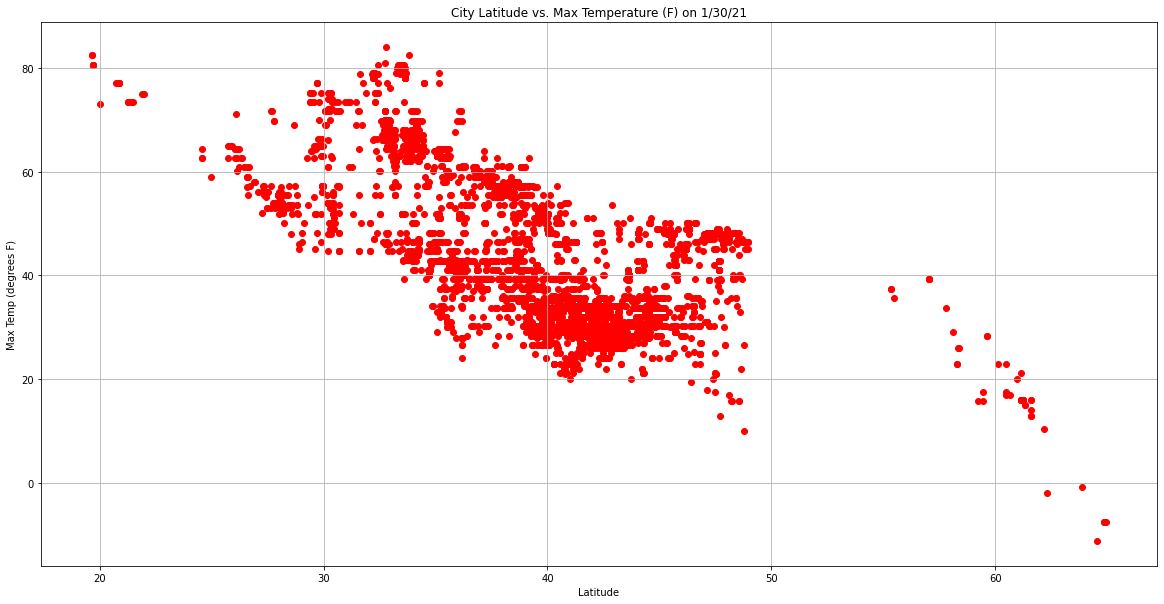

In [29]:
plt.figure(figsize = (20,10))
plt.scatter(x = merged_df["latitude"], y = merged_df["Max Temp (degrees F)"],marker = "o", c= "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.title("City Latitude vs. Max Temperature (F) on 1/30/21")
plt.grid(True)
plt.savefig("../Output/Temp_Latitude_Scatter.png")
plt.show()

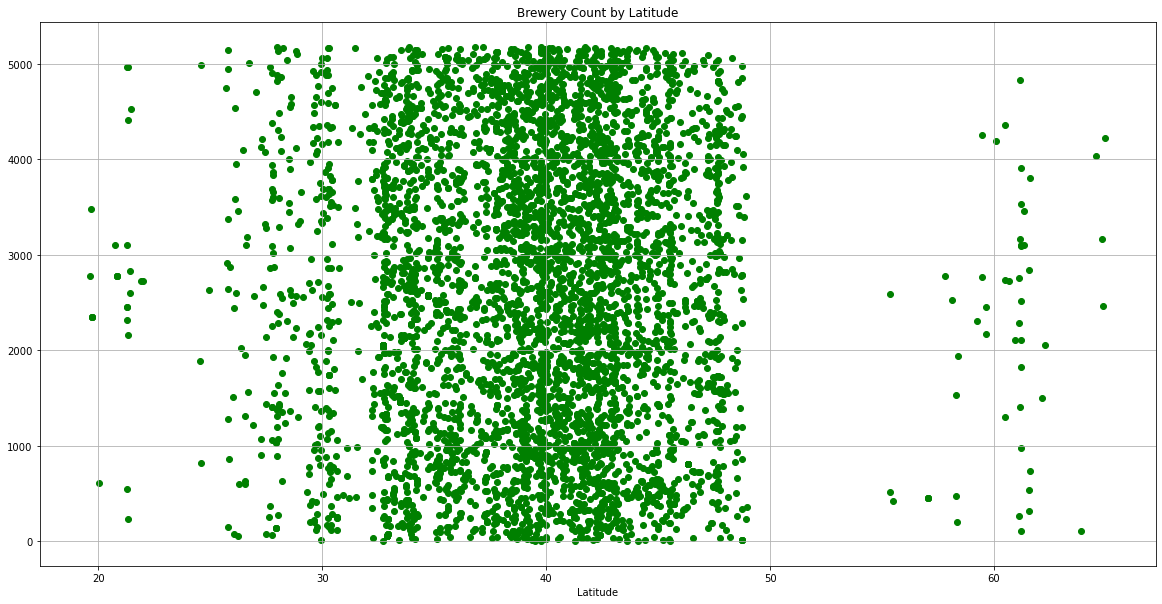

In [30]:
plt.figure(figsize = (20,10))
plt.scatter(x = merged_df["latitude"], y = merged_df.index,marker = "o", c= "g")
plt.xlabel("Latitude")
plt.grid(True)
plt.title("Brewery Count by Latitude")
plt.savefig("../Output/Brewery_Count_Latitude.png")
plt.show()